In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Standard python libraries
import os
import requests

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, auc, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.impute import SimpleImputer
import optuna
from optuna.integration import CatBoostPruningCallback
import joblib

import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

# Experiments block
import wandb


pd.set_option('display.max_columns', None)

In [3]:
# Подготовим инфраструктуру для версионирования экспериментов
project_name = "Makarov_mfdp_unit_5"
exp_name = "exp_"
config = []

## Эксперимент 7 Замена модели на lightGBM, подбор параметров
На лучшем фича селекшене и с учётом эксперимента про кросс-валидацию

In [4]:
outliers_data_x = pd.read_csv("2_best_features_permutation.csv")
outliers_data_y = pd.read_csv("1_outliers_raw_data")["TARGET"]

In [6]:
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets
from sklearn.model_selection import KFold


if __name__ == "__main__":
    data = outliers_data_x
    target = outliers_data_y
    dtrain = lgb.Dataset(data, label=target)

    params = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

    tuner = lgb.LightGBMTunerCV(
        params,
        dtrain,
        folds=KFold(n_splits=3),
        callbacks=[early_stopping(100), log_evaluation(100)],
    )

    tuner.run()

    print("Best score:", tuner.best_score)
    best_params = tuner.best_params
    print("Best params:", best_params)
    print("  Params: ")
    for key, value in best_params.items():
        print("    {}: {}".format(key, value))

[I 2024-07-08 19:22:07,553] A new study created in memory with name: no-name-999828ce-ba04-431d-89ef-3d7018c64eca
feature_fraction, val_score: -inf:   0%|                                                                                                                                                                                     | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868918 + 0.00850717
[200]	cv_agg's valid auc: 0.870539 + 0.00868267
[300]	cv_agg's valid auc: 0.869847 + 0.00897938


feature_fraction, val_score: 0.871177:  14%|########################1                                                                                                                                                | 1/7 [00:03<00:18,  3.16s/it]

Early stopping, best iteration is:
[230]	cv_agg's valid auc: 0.871177 + 0.00877076
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867601 + 0.0132871
[200]	cv_agg's valid auc: 0.86845 + 0.0147155


feature_fraction, val_score: 0.871177:  29%|################################################2                                                                                                                        | 2/7 [00:06<00:14,  2.98s/it]

Early stopping, best iteration is:
[199]	cv_agg's valid auc: 0.86855 + 0.0146251
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.869608 + 0.00990835


feature_fraction, val_score: 0.871177:  43%|########################################################################4                                                                                                | 3/7 [00:07<00:09,  2.46s/it]

Early stopping, best iteration is:
[90]	cv_agg's valid auc: 0.870193 + 0.00896187
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.869289 + 0.00943597
[200]	cv_agg's valid auc: 0.86964 + 0.0112101


feature_fraction, val_score: 0.871177:  57%|################################################################################################5                                                                        | 4/7 [00:10<00:07,  2.52s/it]

Early stopping, best iteration is:
[170]	cv_agg's valid auc: 0.870534 + 0.0105415
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.872066 + 0.0101734
[200]	cv_agg's valid auc: 0.872397 + 0.0103624
[300]	cv_agg's valid auc: 0.873057 + 0.0112002


feature_fraction, val_score: 0.873278:  71%|########################################################################################################################7                                                | 5/7 [00:13<00:05,  2.78s/it]

Early stopping, best iteration is:
[251]	cv_agg's valid auc: 0.873278 + 0.0108827
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.872636 + 0.00890366
[200]	cv_agg's valid auc: 0.87489 + 0.010245


feature_fraction, val_score: 0.874890:  86%|################################################################################################################################################8                        | 6/7 [00:16<00:02,  2.84s/it]

[300]	cv_agg's valid auc: 0.872587 + 0.0108487
Early stopping, best iteration is:
[200]	cv_agg's valid auc: 0.87489 + 0.010245
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.871731 + 0.00800751


feature_fraction, val_score: 0.874890: 100%|#########################################################################################################################################################################| 7/7 [00:18<00:00,  2.66s/it]


Early stopping, best iteration is:
[90]	cv_agg's valid auc: 0.872294 + 0.00865946


num_leaves, val_score: 0.874890:   0%|                                                                                                                                                                                      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.869339 + 0.00926562
[200]	cv_agg's valid auc: 0.873403 + 0.0110903
[300]	cv_agg's valid auc: 0.87492 + 0.00952061


num_leaves, val_score: 0.875505:   5%|########7                                                                                                                                                                     | 1/20 [00:04<01:20,  4.24s/it]

Early stopping, best iteration is:
[243]	cv_agg's valid auc: 0.875505 + 0.010062
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868405 + 0.00864483
[200]	cv_agg's valid auc: 0.871748 + 0.0105016
[300]	cv_agg's valid auc: 0.874291 + 0.0111919
[400]	cv_agg's valid auc: 0.876523 + 0.0120438
[500]	cv_agg's valid auc: 0.877272 + 0.0124664
[600]	cv_agg's valid auc: 0.877325 + 0.0130664
[700]	cv_agg's valid auc: 0.877156 + 0.012945


num_leaves, val_score: 0.877426:  10%|#################4                                                                                                                                                            | 2/20 [00:15<02:33,  8.51s/it]

Early stopping, best iteration is:
[626]	cv_agg's valid auc: 0.877426 + 0.0130129
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867283 + 0.0106358
[200]	cv_agg's valid auc: 0.871886 + 0.0103846
[300]	cv_agg's valid auc: 0.873346 + 0.0120765
[400]	cv_agg's valid auc: 0.87427 + 0.0126326
[500]	cv_agg's valid auc: 0.874997 + 0.0121019
[600]	cv_agg's valid auc: 0.875448 + 0.0118156
[700]	cv_agg's valid auc: 0.875619 + 0.0116578
[800]	cv_agg's valid auc: 0.875535 + 0.011787


num_leaves, val_score: 0.877426:  15%|##########################1                                                                                                                                                   | 3/20 [00:29<03:02, 10.76s/it]

Early stopping, best iteration is:
[775]	cv_agg's valid auc: 0.875741 + 0.0117274
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.860724 + 0.00978071
[200]	cv_agg's valid auc: 0.867656 + 0.00928372
[300]	cv_agg's valid auc: 0.873008 + 0.00991996
[400]	cv_agg's valid auc: 0.874273 + 0.0101413
[500]	cv_agg's valid auc: 0.874806 + 0.0103506
[600]	cv_agg's valid auc: 0.875279 + 0.0106398
[700]	cv_agg's valid auc: 0.875652 + 0.0106995
[800]	cv_agg's valid auc: 0.875913 + 0.0106701


num_leaves, val_score: 0.877426:  20%|##################################8                                                                                                                                           | 4/20 [00:41<03:04, 11.52s/it]

Early stopping, best iteration is:
[754]	cv_agg's valid auc: 0.875982 + 0.0104758
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859062 + 0.00603835
[200]	cv_agg's valid auc: 0.868474 + 0.00625766
[300]	cv_agg's valid auc: 0.872446 + 0.00755736
[400]	cv_agg's valid auc: 0.874237 + 0.00732596
[500]	cv_agg's valid auc: 0.87439 + 0.00736326
[600]	cv_agg's valid auc: 0.875034 + 0.0071423
[700]	cv_agg's valid auc: 0.875213 + 0.00735455
[800]	cv_agg's valid auc: 0.87533 + 0.00712317
[900]	cv_agg's valid auc: 0.875457 + 0.00720759


num_leaves, val_score: 0.877426:  25%|###########################################5                                                                                                                                  | 5/20 [00:53<02:55, 11.72s/it]

[1000]	cv_agg's valid auc: 0.875784 + 0.00731323
Did not meet early stopping. Best iteration is:
[998]	cv_agg's valid auc: 0.875786 + 0.00730133
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.860468 + 0.0110343
[200]	cv_agg's valid auc: 0.866225 + 0.0103973
[300]	cv_agg's valid auc: 0.87143 + 0.00970202
[400]	cv_agg's valid auc: 0.873157 + 0.00965101
[500]	cv_agg's valid auc: 0.873735 + 0.00993385
[600]	cv_agg's valid auc: 0.873741 + 0.0100975
[700]	cv_agg's valid auc: 0.873998 + 0.00999791


num_leaves, val_score: 0.877426:  30%|####################################################2                                                                                                                         | 6/20 [01:04<02:40, 11.47s/it]

Early stopping, best iteration is:
[657]	cv_agg's valid auc: 0.874185 + 0.0100547
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865192 + 0.00403098
[200]	cv_agg's valid auc: 0.870181 + 0.00747028
[300]	cv_agg's valid auc: 0.872937 + 0.00864653
[400]	cv_agg's valid auc: 0.874294 + 0.00790946
[500]	cv_agg's valid auc: 0.874274 + 0.00801468


num_leaves, val_score: 0.877426:  35%|############################################################9                                                                                                                 | 7/20 [01:14<02:19, 10.72s/it]

Early stopping, best iteration is:
[421]	cv_agg's valid auc: 0.874643 + 0.00789488
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865721 + 0.00668075
[200]	cv_agg's valid auc: 0.87236 + 0.00839332
[300]	cv_agg's valid auc: 0.875952 + 0.00969899
[400]	cv_agg's valid auc: 0.877243 + 0.0103914
[500]	cv_agg's valid auc: 0.877333 + 0.0103934


num_leaves, val_score: 0.877457:  40%|#####################################################################6                                                                                                        | 8/20 [01:23<02:04, 10.33s/it]

Early stopping, best iteration is:
[429]	cv_agg's valid auc: 0.877457 + 0.0104688
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867453 + 0.00631043
[200]	cv_agg's valid auc: 0.872271 + 0.00921728
[300]	cv_agg's valid auc: 0.874831 + 0.0095671
[400]	cv_agg's valid auc: 0.875726 + 0.00862936
[500]	cv_agg's valid auc: 0.876433 + 0.00788694
[600]	cv_agg's valid auc: 0.876844 + 0.00779669
[700]	cv_agg's valid auc: 0.87674 + 0.00787035
Early stopping, best iteration is:
[623]	cv_agg's valid auc: 0.876932 + 0.00780471


num_leaves, val_score: 0.877457:  45%|##############################################################################3                                                                                               | 9/20 [01:34<01:54, 10.44s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.805171 + 0.0181632
[200]	cv_agg's valid auc: 0.827605 + 0.0187271
[300]	cv_agg's valid auc: 0.837732 + 0.0172531
[400]	cv_agg's valid auc: 0.843376 + 0.0166106
[500]	cv_agg's valid auc: 0.846895 + 0.0161919
[600]	cv_agg's valid auc: 0.848951 + 0.0157976
[700]	cv_agg's valid auc: 0.850734 + 0.015558
[800]	cv_agg's valid auc: 0.851928 + 0.0154974
[900]	cv_agg's valid auc: 0.852756 + 0.0151305


num_leaves, val_score: 0.877457:  50%|######################################################################################5                                                                                      | 10/20 [01:40<01:30,  9.09s/it]

[1000]	cv_agg's valid auc: 0.853609 + 0.0146794
Did not meet early stopping. Best iteration is:
[988]	cv_agg's valid auc: 0.853656 + 0.0148253
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867283 + 0.0106358
[200]	cv_agg's valid auc: 0.871886 + 0.0103846
[300]	cv_agg's valid auc: 0.873346 + 0.0120765
[400]	cv_agg's valid auc: 0.87427 + 0.0126326
[500]	cv_agg's valid auc: 0.874997 + 0.0121019
[600]	cv_agg's valid auc: 0.875448 + 0.0118156
[700]	cv_agg's valid auc: 0.875619 + 0.0116578
[800]	cv_agg's valid auc: 0.875535 + 0.011787


num_leaves, val_score: 0.877457:  55%|###############################################################################################1                                                                             | 11/20 [01:54<01:34, 10.52s/it]

Early stopping, best iteration is:
[775]	cv_agg's valid auc: 0.875741 + 0.0117274
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867088 + 0.00966015
[200]	cv_agg's valid auc: 0.869798 + 0.00988852
[300]	cv_agg's valid auc: 0.873827 + 0.00919457
[400]	cv_agg's valid auc: 0.874677 + 0.00934954


num_leaves, val_score: 0.877457:  60%|#######################################################################################################8                                                                     | 12/20 [02:02<01:19,  9.96s/it]

Early stopping, best iteration is:
[388]	cv_agg's valid auc: 0.874815 + 0.00921341
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868296 + 0.00938246
[200]	cv_agg's valid auc: 0.871005 + 0.00906269
[300]	cv_agg's valid auc: 0.874159 + 0.00869763
[400]	cv_agg's valid auc: 0.874271 + 0.00860803


num_leaves, val_score: 0.877457:  65%|################################################################################################################4                                                            | 13/20 [02:09<01:02,  8.95s/it]

Early stopping, best iteration is:
[350]	cv_agg's valid auc: 0.875498 + 0.00896851
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86499 + 0.00801978
[200]	cv_agg's valid auc: 0.870262 + 0.00954607
[300]	cv_agg's valid auc: 0.874574 + 0.00842169
[400]	cv_agg's valid auc: 0.876387 + 0.00826694
[500]	cv_agg's valid auc: 0.876748 + 0.00859064
[600]	cv_agg's valid auc: 0.877052 + 0.00860714
[700]	cv_agg's valid auc: 0.877262 + 0.00861159
[800]	cv_agg's valid auc: 0.877575 + 0.00850321
[900]	cv_agg's valid auc: 0.877638 + 0.00834026


num_leaves, val_score: 0.877851:  70%|#########################################################################################################################1                                                   | 14/20 [02:21<00:58,  9.75s/it]

[1000]	cv_agg's valid auc: 0.877674 + 0.00822652
Did not meet early stopping. Best iteration is:
[920]	cv_agg's valid auc: 0.877851 + 0.00821297
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864828 + 0.00791806
[200]	cv_agg's valid auc: 0.868569 + 0.00852519
[300]	cv_agg's valid auc: 0.873273 + 0.00927463
[400]	cv_agg's valid auc: 0.874753 + 0.00980147
[500]	cv_agg's valid auc: 0.874849 + 0.00961951
[600]	cv_agg's valid auc: 0.875006 + 0.00965971
[700]	cv_agg's valid auc: 0.875171 + 0.00976148
[800]	cv_agg's valid auc: 0.875223 + 0.00977772
[900]	cv_agg's valid auc: 0.875263 + 0.0100913


num_leaves, val_score: 0.877851:  75%|#################################################################################################################################7                                           | 15/20 [02:33<00:53, 10.72s/it]

[1000]	cv_agg's valid auc: 0.875357 + 0.00972655
Did not meet early stopping. Best iteration is:
[932]	cv_agg's valid auc: 0.875366 + 0.00988922
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866288 + 0.010477
[200]	cv_agg's valid auc: 0.871686 + 0.0113462
[300]	cv_agg's valid auc: 0.873346 + 0.0110392
[400]	cv_agg's valid auc: 0.875376 + 0.0101916
[500]	cv_agg's valid auc: 0.875878 + 0.0103079
[600]	cv_agg's valid auc: 0.876511 + 0.010151
[700]	cv_agg's valid auc: 0.876395 + 0.0106185


num_leaves, val_score: 0.877851:  80%|##########################################################################################################################################4                                  | 16/20 [02:43<00:41, 10.30s/it]

Early stopping, best iteration is:
[638]	cv_agg's valid auc: 0.876559 + 0.0104259
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864492 + 0.0109404
[200]	cv_agg's valid auc: 0.869994 + 0.00991749
[300]	cv_agg's valid auc: 0.874235 + 0.00911072
[400]	cv_agg's valid auc: 0.876111 + 0.00958091


num_leaves, val_score: 0.877851:  85%|###################################################################################################################################################                          | 17/20 [02:51<00:29,  9.79s/it]

[500]	cv_agg's valid auc: 0.876165 + 0.00928648
Early stopping, best iteration is:
[415]	cv_agg's valid auc: 0.876385 + 0.00945284
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861613 + 0.00827876
[200]	cv_agg's valid auc: 0.869573 + 0.00930706
[300]	cv_agg's valid auc: 0.874866 + 0.00832745
[400]	cv_agg's valid auc: 0.875961 + 0.00814302


num_leaves, val_score: 0.877851:  90%|###########################################################################################################################################################7                 | 18/20 [03:00<00:18,  9.30s/it]

[500]	cv_agg's valid auc: 0.875824 + 0.00833668
Early stopping, best iteration is:
[410]	cv_agg's valid auc: 0.876074 + 0.00817476
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866288 + 0.010477
[200]	cv_agg's valid auc: 0.871686 + 0.0113462
[300]	cv_agg's valid auc: 0.873346 + 0.0110392
[400]	cv_agg's valid auc: 0.875376 + 0.0101916
[500]	cv_agg's valid auc: 0.875878 + 0.0103079
[600]	cv_agg's valid auc: 0.876511 + 0.010151
[700]	cv_agg's valid auc: 0.876395 + 0.0106185


num_leaves, val_score: 0.877851:  95%|####################################################################################################################################################################3        | 19/20 [03:10<00:09,  9.53s/it]

Early stopping, best iteration is:
[638]	cv_agg's valid auc: 0.876559 + 0.0104259
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861905 + 0.00549452
[200]	cv_agg's valid auc: 0.869135 + 0.00624628
[300]	cv_agg's valid auc: 0.87354 + 0.00659062
[400]	cv_agg's valid auc: 0.874524 + 0.00664963
[500]	cv_agg's valid auc: 0.874887 + 0.00694329
[600]	cv_agg's valid auc: 0.874954 + 0.00687142


num_leaves, val_score: 0.877851: 100%|#############################################################################################################################################################################| 20/20 [03:19<00:00, 10.00s/it]


Early stopping, best iteration is:
[539]	cv_agg's valid auc: 0.875095 + 0.00691044


bagging, val_score: 0.877851:   0%|                                                                                                                                                                                         | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.857958 + 0.00685945
[200]	cv_agg's valid auc: 0.860782 + 0.00965126


bagging, val_score: 0.877851:  10%|#################7                                                                                                                                                               | 1/10 [00:04<00:44,  4.99s/it]

Early stopping, best iteration is:
[139]	cv_agg's valid auc: 0.862273 + 0.0076539
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865058 + 0.00895703
[200]	cv_agg's valid auc: 0.870481 + 0.0107476
[300]	cv_agg's valid auc: 0.873707 + 0.0100753
[400]	cv_agg's valid auc: 0.875789 + 0.0101231
[500]	cv_agg's valid auc: 0.876396 + 0.0100855


bagging, val_score: 0.877851:  20%|###################################4                                                                                                                                             | 2/10 [00:14<01:00,  7.61s/it]

Early stopping, best iteration is:
[478]	cv_agg's valid auc: 0.876518 + 0.0100014
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.838373 + 0.00400602
[200]	cv_agg's valid auc: 0.843566 + 0.000143325
[300]	cv_agg's valid auc: 0.849382 + 0.00354437
[400]	cv_agg's valid auc: 0.851427 + 0.00436465
[500]	cv_agg's valid auc: 0.854224 + 0.00308072
[600]	cv_agg's valid auc: 0.855568 + 0.0031265
[700]	cv_agg's valid auc: 0.856413 + 0.00421857
[800]	cv_agg's valid auc: 0.857186 + 0.00411411


bagging, val_score: 0.877851:  30%|#####################################################1                                                                                                                           | 3/10 [00:27<01:09,  9.96s/it]

[900]	cv_agg's valid auc: 0.857249 + 0.00389959
Early stopping, best iteration is:
[813]	cv_agg's valid auc: 0.857426 + 0.00385256
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866286 + 0.00911984
[200]	cv_agg's valid auc: 0.872257 + 0.00865525
[300]	cv_agg's valid auc: 0.875901 + 0.00864862
[400]	cv_agg's valid auc: 0.87699 + 0.00930527


bagging, val_score: 0.877851:  40%|######################################################################8                                                                                                          | 4/10 [00:35<00:55,  9.33s/it]

Early stopping, best iteration is:
[375]	cv_agg's valid auc: 0.877351 + 0.00900914
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.863939 + 0.0115166
[200]	cv_agg's valid auc: 0.867205 + 0.00988764
[300]	cv_agg's valid auc: 0.872929 + 0.00983747
[400]	cv_agg's valid auc: 0.874449 + 0.00996943


bagging, val_score: 0.877851:  50%|########################################################################################5                                                                                        | 5/10 [00:43<00:44,  8.93s/it]

[500]	cv_agg's valid auc: 0.874475 + 0.0101512
Early stopping, best iteration is:
[410]	cv_agg's valid auc: 0.874736 + 0.009979
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.858855 + 0.00598643
[200]	cv_agg's valid auc: 0.865875 + 0.00700945
[300]	cv_agg's valid auc: 0.870448 + 0.00759429
[400]	cv_agg's valid auc: 0.872702 + 0.00813134
[500]	cv_agg's valid auc: 0.872942 + 0.00847664
[600]	cv_agg's valid auc: 0.873552 + 0.00823734


bagging, val_score: 0.877851:  60%|##########################################################################################################2                                                                      | 6/10 [00:54<00:38,  9.60s/it]

[700]	cv_agg's valid auc: 0.873396 + 0.00791906
Early stopping, best iteration is:
[615]	cv_agg's valid auc: 0.87359 + 0.00823421
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.854404 + 0.00687526
[200]	cv_agg's valid auc: 0.863733 + 0.00925237
[300]	cv_agg's valid auc: 0.869086 + 0.00848038
[400]	cv_agg's valid auc: 0.870841 + 0.00879502
[500]	cv_agg's valid auc: 0.871997 + 0.00808328
[600]	cv_agg's valid auc: 0.872293 + 0.00718864


bagging, val_score: 0.877851:  70%|###########################################################################################################################9                                                     | 7/10 [01:05<00:30, 10.12s/it]

Early stopping, best iteration is:
[593]	cv_agg's valid auc: 0.872393 + 0.00732122
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864433 + 0.0131731
[200]	cv_agg's valid auc: 0.86947 + 0.0118304
[300]	cv_agg's valid auc: 0.873097 + 0.0124988
[400]	cv_agg's valid auc: 0.873615 + 0.0124345
[500]	cv_agg's valid auc: 0.874573 + 0.0120549
[600]	cv_agg's valid auc: 0.874783 + 0.0120317
[700]	cv_agg's valid auc: 0.874661 + 0.0120274
[800]	cv_agg's valid auc: 0.874788 + 0.011884


bagging, val_score: 0.877851:  80%|#############################################################################################################################################6                                   | 8/10 [01:16<00:20, 10.43s/it]

Early stopping, best iteration is:
[749]	cv_agg's valid auc: 0.875021 + 0.0120154
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.849199 + 0.00919171
[200]	cv_agg's valid auc: 0.858057 + 0.0109415
[300]	cv_agg's valid auc: 0.862105 + 0.0126599
[400]	cv_agg's valid auc: 0.865145 + 0.012766
[500]	cv_agg's valid auc: 0.867636 + 0.0123373
[600]	cv_agg's valid auc: 0.868486 + 0.012585
[700]	cv_agg's valid auc: 0.868867 + 0.012246
[800]	cv_agg's valid auc: 0.86918 + 0.0121024
[900]	cv_agg's valid auc: 0.869491 + 0.0120359


bagging, val_score: 0.877851:  90%|###############################################################################################################################################################3                 | 9/10 [01:29<00:11, 11.16s/it]

[1000]	cv_agg's valid auc: 0.869389 + 0.0121454
Did not meet early stopping. Best iteration is:
[920]	cv_agg's valid auc: 0.869601 + 0.0122302
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864066 + 0.00974135
[200]	cv_agg's valid auc: 0.868144 + 0.00919265
[300]	cv_agg's valid auc: 0.871943 + 0.00920453
[400]	cv_agg's valid auc: 0.87357 + 0.0086077
[500]	cv_agg's valid auc: 0.873595 + 0.00822093
[600]	cv_agg's valid auc: 0.874165 + 0.0081752
[700]	cv_agg's valid auc: 0.874224 + 0.00838092
[800]	cv_agg's valid auc: 0.874626 + 0.00878895
[900]	cv_agg's valid auc: 0.8746 + 0.00863162


bagging, val_score: 0.877851: 100%|################################################################################################################################################################################| 10/10 [01:42<00:00, 10.27s/it]


Early stopping, best iteration is:
[862]	cv_agg's valid auc: 0.874772 + 0.00862407


feature_fraction_stage2, val_score: 0.877851:   0%|                                                                                                                                                                          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.862987 + 0.0123374
[200]	cv_agg's valid auc: 0.868638 + 0.0105233
[300]	cv_agg's valid auc: 0.873369 + 0.00994999
[400]	cv_agg's valid auc: 0.874382 + 0.00968651
[500]	cv_agg's valid auc: 0.87455 + 0.00953323


feature_fraction_stage2, val_score: 0.877851:  33%|######################################################                                                                                                            | 1/3 [00:11<00:22, 11.38s/it]

Early stopping, best iteration is:
[456]	cv_agg's valid auc: 0.874843 + 0.009469
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86499 + 0.00801978
[200]	cv_agg's valid auc: 0.870262 + 0.00954607
[300]	cv_agg's valid auc: 0.874574 + 0.00842169
[400]	cv_agg's valid auc: 0.876387 + 0.00826694
[500]	cv_agg's valid auc: 0.876748 + 0.00859064
[600]	cv_agg's valid auc: 0.877052 + 0.00860714
[700]	cv_agg's valid auc: 0.877262 + 0.00861159
[800]	cv_agg's valid auc: 0.877575 + 0.00850321
[900]	cv_agg's valid auc: 0.877638 + 0.00834026


feature_fraction_stage2, val_score: 0.877851:  67%|############################################################################################################                                                      | 2/3 [00:24<00:12, 12.27s/it]

[1000]	cv_agg's valid auc: 0.877674 + 0.00822652
Did not meet early stopping. Best iteration is:
[920]	cv_agg's valid auc: 0.877851 + 0.00821297
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864388 + 0.00807967
[200]	cv_agg's valid auc: 0.869273 + 0.00773254
[300]	cv_agg's valid auc: 0.873254 + 0.0078304
[400]	cv_agg's valid auc: 0.87394 + 0.00863213
[500]	cv_agg's valid auc: 0.874232 + 0.00886628
[600]	cv_agg's valid auc: 0.874405 + 0.00896645
[700]	cv_agg's valid auc: 0.874739 + 0.00912807
[800]	cv_agg's valid auc: 0.874819 + 0.00890052
[900]	cv_agg's valid auc: 0.874953 + 0.00881597


feature_fraction_stage2, val_score: 0.877851: 100%|##################################################################################################################################################################| 3/3 [00:37<00:00, 12.34s/it]


Early stopping, best iteration is:
[879]	cv_agg's valid auc: 0.875051 + 0.00878836


regularization_factors, val_score: 0.877851:   0%|                                                                                                                                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866509 + 0.00848465
[200]	cv_agg's valid auc: 0.873253 + 0.00906872
[300]	cv_agg's valid auc: 0.875736 + 0.00891879
[400]	cv_agg's valid auc: 0.876627 + 0.00918506
[500]	cv_agg's valid auc: 0.877446 + 0.00898811
[600]	cv_agg's valid auc: 0.877497 + 0.00891623


regularization_factors, val_score: 0.877851:   5%|########1                                                                                                                                                         | 1/20 [00:09<03:00,  9.52s/it]

Early stopping, best iteration is:
[540]	cv_agg's valid auc: 0.877502 + 0.00890961
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868244 + 0.00791098
[200]	cv_agg's valid auc: 0.875058 + 0.00784757
[300]	cv_agg's valid auc: 0.876882 + 0.00801122
[400]	cv_agg's valid auc: 0.878481 + 0.00800137
[500]	cv_agg's valid auc: 0.878773 + 0.00793591


regularization_factors, val_score: 0.878792:  10%|################2                                                                                                                                                 | 2/20 [00:19<02:52,  9.56s/it]

Early stopping, best iteration is:
[447]	cv_agg's valid auc: 0.878792 + 0.00787975
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86742 + 0.00564309
[200]	cv_agg's valid auc: 0.874236 + 0.00667018
[300]	cv_agg's valid auc: 0.876066 + 0.00705297
[400]	cv_agg's valid auc: 0.877427 + 0.00710229
[500]	cv_agg's valid auc: 0.877789 + 0.00730425


regularization_factors, val_score: 0.878792:  15%|########################3                                                                                                                                         | 3/20 [00:27<02:33,  9.01s/it]

Early stopping, best iteration is:
[460]	cv_agg's valid auc: 0.877789 + 0.00730436
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.870146 + 0.00939966
[200]	cv_agg's valid auc: 0.874783 + 0.00924672
[300]	cv_agg's valid auc: 0.877394 + 0.00854389
[400]	cv_agg's valid auc: 0.878598 + 0.0079796
[500]	cv_agg's valid auc: 0.879139 + 0.00770107


regularization_factors, val_score: 0.879206:  20%|################################4                                                                                                                                 | 4/20 [00:37<02:30,  9.41s/it]

[600]	cv_agg's valid auc: 0.879205 + 0.00760983
Early stopping, best iteration is:
[525]	cv_agg's valid auc: 0.879206 + 0.00760803
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.871481 + 0.00638854
[200]	cv_agg's valid auc: 0.875973 + 0.00676894
[300]	cv_agg's valid auc: 0.877408 + 0.00643397
[400]	cv_agg's valid auc: 0.878519 + 0.00624896
[500]	cv_agg's valid auc: 0.878893 + 0.00638981


regularization_factors, val_score: 0.879206:  25%|########################################5                                                                                                                         | 5/20 [00:46<02:17,  9.19s/it]

Early stopping, best iteration is:
[498]	cv_agg's valid auc: 0.8789 + 0.00637882
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.874721 + 0.00894005
[200]	cv_agg's valid auc: 0.877719 + 0.00868054
[300]	cv_agg's valid auc: 0.878901 + 0.00831947
[400]	cv_agg's valid auc: 0.879716 + 0.00811069
[500]	cv_agg's valid auc: 0.879915 + 0.00828546


regularization_factors, val_score: 0.879940:  30%|################################################6                                                                                                                 | 6/20 [00:55<02:07,  9.10s/it]

Early stopping, best iteration is:
[451]	cv_agg's valid auc: 0.87994 + 0.00827455
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873838 + 0.00892848
[200]	cv_agg's valid auc: 0.877279 + 0.00919839
[300]	cv_agg's valid auc: 0.879036 + 0.00887325
[400]	cv_agg's valid auc: 0.879727 + 0.00887618
[500]	cv_agg's valid auc: 0.880314 + 0.00867957


regularization_factors, val_score: 0.880338:  35%|########################################################7                                                                                                         | 7/20 [01:03<01:53,  8.70s/it]

[600]	cv_agg's valid auc: 0.880315 + 0.00867815
Early stopping, best iteration is:
[507]	cv_agg's valid auc: 0.880338 + 0.00864616
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.875681 + 0.00933458
[200]	cv_agg's valid auc: 0.878959 + 0.00992381
[300]	cv_agg's valid auc: 0.880669 + 0.00942837
[400]	cv_agg's valid auc: 0.880781 + 0.00923033
[500]	cv_agg's valid auc: 0.880982 + 0.00959097


regularization_factors, val_score: 0.881237:  40%|################################################################8                                                                                                 | 8/20 [01:13<01:49,  9.14s/it]

Early stopping, best iteration is:
[459]	cv_agg's valid auc: 0.881237 + 0.00938703
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.875102 + 0.0107684
[200]	cv_agg's valid auc: 0.880552 + 0.0106103
[300]	cv_agg's valid auc: 0.88191 + 0.0104494


regularization_factors, val_score: 0.881961:  45%|########################################################################9                                                                                         | 9/20 [01:17<01:24,  7.68s/it]

Early stopping, best iteration is:
[273]	cv_agg's valid auc: 0.881961 + 0.0103761
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.874179 + 0.00926585
[200]	cv_agg's valid auc: 0.881315 + 0.0083431
[300]	cv_agg's valid auc: 0.881742 + 0.00863462


regularization_factors, val_score: 0.881961:  50%|################################################################################5                                                                                | 10/20 [01:21<01:05,  6.52s/it]

[400]	cv_agg's valid auc: 0.881745 + 0.0086381
Early stopping, best iteration is:
[314]	cv_agg's valid auc: 0.881747 + 0.00864069
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.876236 + 0.00970109
[200]	cv_agg's valid auc: 0.881889 + 0.00930026
[300]	cv_agg's valid auc: 0.882865 + 0.00943263


regularization_factors, val_score: 0.882868:  55%|########################################################################################5                                                                        | 11/20 [01:25<00:50,  5.66s/it]

Early stopping, best iteration is:
[252]	cv_agg's valid auc: 0.882868 + 0.00953492
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873469 + 0.00982831
[200]	cv_agg's valid auc: 0.880869 + 0.00953436
[300]	cv_agg's valid auc: 0.881901 + 0.00968037


regularization_factors, val_score: 0.882868:  60%|################################################################################################6                                                                | 12/20 [01:28<00:38,  4.87s/it]

Early stopping, best iteration is:
[246]	cv_agg's valid auc: 0.881902 + 0.00967938
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.874546 + 0.0102108
[200]	cv_agg's valid auc: 0.881037 + 0.0090382
[300]	cv_agg's valid auc: 0.881796 + 0.00922206


regularization_factors, val_score: 0.882868:  65%|########################################################################################################6                                                        | 13/20 [01:32<00:31,  4.52s/it]

Early stopping, best iteration is:
[240]	cv_agg's valid auc: 0.881811 + 0.00922682
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873401 + 0.0112472
[200]	cv_agg's valid auc: 0.881917 + 0.0105851
[300]	cv_agg's valid auc: 0.882536 + 0.0105019
[400]	cv_agg's valid auc: 0.882541 + 0.0104956


regularization_factors, val_score: 0.882868:  70%|################################################################################################################7                                                | 14/20 [01:36<00:26,  4.36s/it]

Early stopping, best iteration is:
[358]	cv_agg's valid auc: 0.882541 + 0.0104956
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.87487 + 0.0108595
[200]	cv_agg's valid auc: 0.881778 + 0.0098193
[300]	cv_agg's valid auc: 0.882461 + 0.00988243
Early stopping, best iteration is:
[229]	cv_agg's valid auc: 0.882589 + 0.0101215


regularization_factors, val_score: 0.882868:  75%|########################################################################################################################7                                        | 15/20 [01:39<00:20,  4.07s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.874602 + 0.00988891
[200]	cv_agg's valid auc: 0.88038 + 0.00893936
[300]	cv_agg's valid auc: 0.880447 + 0.00900284
[400]	cv_agg's valid auc: 0.880448 + 0.0090029
Early stopping, best iteration is:
[332]	cv_agg's valid auc: 0.880448 + 0.00900284


regularization_factors, val_score: 0.882868:  80%|################################################################################################################################8                                | 16/20 [01:42<00:15,  3.90s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873349 + 0.0103031
[200]	cv_agg's valid auc: 0.880817 + 0.00897376
[300]	cv_agg's valid auc: 0.88148 + 0.00891432
Early stopping, best iteration is:
[235]	cv_agg's valid auc: 0.881524 + 0.00902027


regularization_factors, val_score: 0.882868:  85%|########################################################################################################################################8                        | 17/20 [01:46<00:10,  3.66s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.860248 + 0.00990762
[200]	cv_agg's valid auc: 0.868072 + 0.0107338
[300]	cv_agg's valid auc: 0.871943 + 0.0103857
[400]	cv_agg's valid auc: 0.873806 + 0.0104784
[500]	cv_agg's valid auc: 0.874247 + 0.0103104
[600]	cv_agg's valid auc: 0.874762 + 0.0101832
[700]	cv_agg's valid auc: 0.875053 + 0.0101481
[800]	cv_agg's valid auc: 0.875185 + 0.0102227


regularization_factors, val_score: 0.882868:  90%|################################################################################################################################################9                | 18/20 [01:59<00:13,  6.59s/it]

Early stopping, best iteration is:
[757]	cv_agg's valid auc: 0.875264 + 0.0101794
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.875084 + 0.00922008
[200]	cv_agg's valid auc: 0.88189 + 0.00775847


regularization_factors, val_score: 0.882868:  95%|########################################################################################################################################################9        | 19/20 [02:02<00:05,  5.50s/it]

[300]	cv_agg's valid auc: 0.881973 + 0.00788302
Early stopping, best iteration is:
[202]	cv_agg's valid auc: 0.881978 + 0.00773965
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.875346 + 0.00970382
[200]	cv_agg's valid auc: 0.881769 + 0.00880826


regularization_factors, val_score: 0.882868: 100%|#################################################################################################################################################################| 20/20 [02:05<00:00,  6.27s/it]


[300]	cv_agg's valid auc: 0.881798 + 0.00884183
Early stopping, best iteration is:
[210]	cv_agg's valid auc: 0.881799 + 0.00883913


min_child_samples, val_score: 0.882868:   0%|                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.87552 + 0.00968667
[200]	cv_agg's valid auc: 0.881605 + 0.0100983
[300]	cv_agg's valid auc: 0.882618 + 0.00988248


min_child_samples, val_score: 0.882868:  20%|#################################6                                                                                                                                      | 1/5 [00:03<00:14,  3.75s/it]

Early stopping, best iteration is:
[270]	cv_agg's valid auc: 0.882654 + 0.00989728
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.877079 + 0.0104943
[200]	cv_agg's valid auc: 0.88239 + 0.0096804
[300]	cv_agg's valid auc: 0.88312 + 0.0101902


min_child_samples, val_score: 0.883258:  40%|###################################################################2                                                                                                    | 2/5 [00:07<00:11,  3.81s/it]

Early stopping, best iteration is:
[253]	cv_agg's valid auc: 0.883258 + 0.00984924
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.876574 + 0.00965599
[200]	cv_agg's valid auc: 0.881157 + 0.00957231
[300]	cv_agg's valid auc: 0.882151 + 0.00927315


min_child_samples, val_score: 0.883258:  60%|####################################################################################################8                                                                   | 3/5 [00:12<00:08,  4.13s/it]

Early stopping, best iteration is:
[270]	cv_agg's valid auc: 0.882191 + 0.00924313
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873232 + 0.0123169
[200]	cv_agg's valid auc: 0.879849 + 0.010454
[300]	cv_agg's valid auc: 0.881446 + 0.010665


min_child_samples, val_score: 0.883258:  80%|######################################################################################################################################4                                 | 4/5 [00:16<00:04,  4.13s/it]

Early stopping, best iteration is:
[250]	cv_agg's valid auc: 0.881511 + 0.0106572
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.878017 + 0.0100071
[200]	cv_agg's valid auc: 0.883226 + 0.00985983
[300]	cv_agg's valid auc: 0.884247 + 0.00934872


min_child_samples, val_score: 0.884472: 100%|########################################################################################################################################################################| 5/5 [00:19<00:00,  3.89s/it]

Early stopping, best iteration is:
[251]	cv_agg's valid auc: 0.884472 + 0.00971858
Best score: 0.8844715768297383
Best params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 5.403515266626482, 'lambda_l2': 7.091511491887405, 'num_leaves': 185, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 100}
  Params: 
    objective: binary
    metric: auc
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 5.403515266626482
    lambda_l2: 7.091511491887405
    num_leaves: 185
    feature_fraction: 0.4
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 100


In [9]:
import lightgbm as lgbm
model_lgbm = lgbm.LGBMClassifier(
    objective='binary',
    metric='auc',
    verbosity=-1,
    boosting_type='gbdt',
    feature_pre_filter=False,
    lambda_l1=5.403515266626482,
    lambda_l2=7.091511491887405,
    num_leaves=185,
    feature_fraction=0.4,
    bagging_fraction=1.0,
    bagging_freq=0,
    min_child_samples=100,
    random_state=42,
    is_unbalance=True,
)

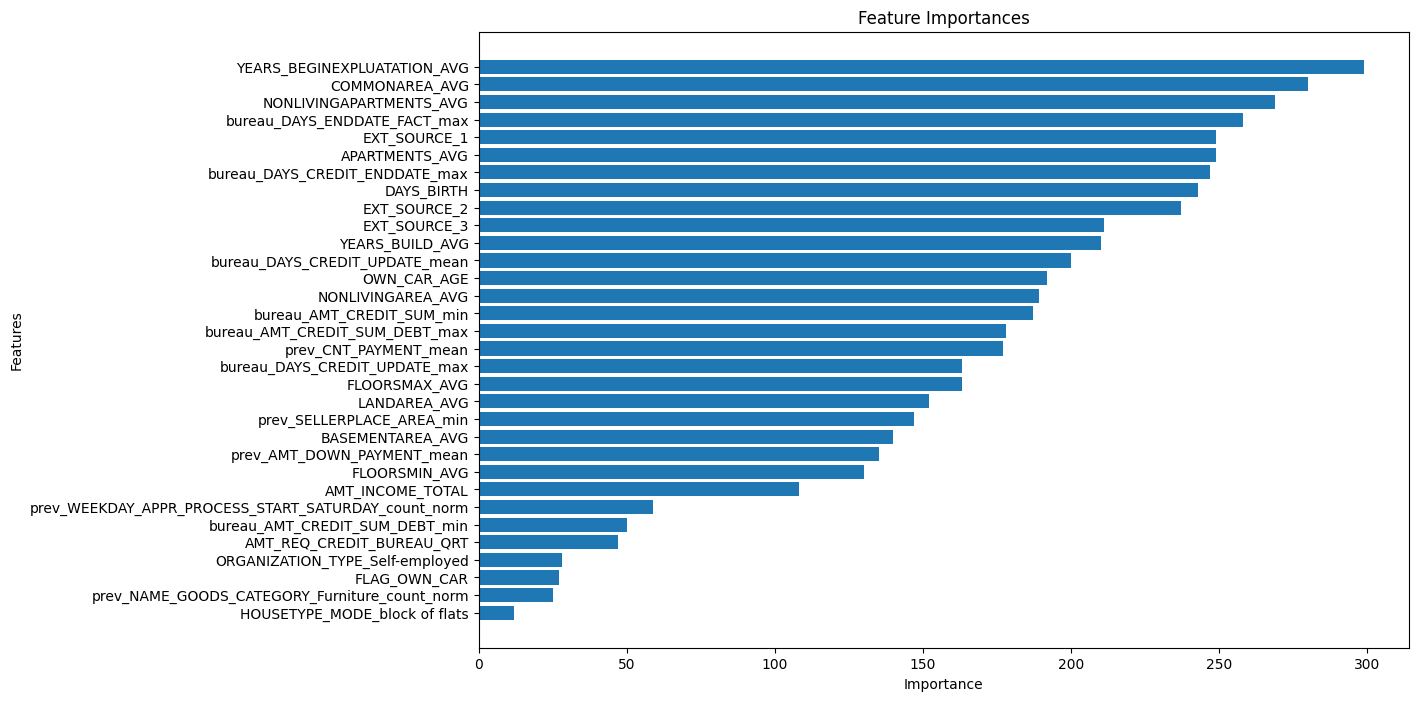

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('auc', 0.8792135593220339)])})

In [11]:
X = outliers_data_x
y = outliers_data_y

train_X_cv, test_X_cv, train_y_cv, test_y_cv = train_test_split(X, y, train_size=0.8, random_state=42)

model_lgbm.fit(train_X_cv, train_y_cv, eval_set=(test_X_cv, test_y_cv))


# Get feature importances
feature_importances = model_lgbm.feature_importances_

# Create a pandas dataframe for easier visualization
importance_df = pd.DataFrame({
    'Features': train_X_cv.columns,
    'Importance': feature_importances
})

# Sort the dataframe based on the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Features'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
model_lgbm.best_score_

In [12]:
y_test_pred_dr = model_lgbm.predict_proba(test_X_cv)
print(accuracy_score(y_true=test_y_cv, y_pred=y_test_pred_dr[:,1].round()))
print(roc_auc_score(y_true=test_y_cv, y_score=y_test_pred_dr[:,1], average="weighted"))
print(classification_report(test_y_cv, y_test_pred_dr[:,1].round()))

0.9504566210045662
0.8792135593220339
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4130
           1       0.92      0.14      0.25       250

    accuracy                           0.95      4380
   macro avg       0.94      0.57      0.61      4380
weighted avg       0.95      0.95      0.93      4380



In [13]:
y_pred = y_test_pred_dr[:,1]
y = test_y_cv

wandb.init(
        project=project_name, name=exp_name+"7"+"_lgbm_tuned"
    )  # Инициализация эксперимента, project - название проекта
wandb.log(
    {
        "accuracy_score": accuracy_score(y_true=y, y_pred=y_pred.round()),
        "f1_score_weighted": f1_score(y_true=y, y_pred=y_pred.round(), average="weighted"),
        "precision_weighted": precision_score(y_true=y, y_pred=y_pred.round(), average="weighted"),
        "roc_auc_score": roc_auc_score(y_true=y, y_score=y_pred, average="weighted"),
        "gini": 2 * roc_auc_score(y_true=y, y_score=y_pred, average="weighted") - 1
    }
)
wandb.sklearn.plot_roc(y_true = y, y_probas = y_test_pred_dr)
#wandb.sklearn.plot_class_proportions(y_train, y_test)
wandb.finish()

wandb: Currently logged in as: qeshtir (qesh-squad). Use `wandb login --relogin` to force relogin


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


accuracy_score,▁
f1_score_weighted,▁
gini,▁
precision_weighted,▁
roc_auc_score,▁
accuracy_score,0.95046
f1_score_weighted,0.93299
gini,0.75843
precision_weighted,0.94913
roc_auc_score,0.87921


### Добавим разбалансированность классов в условие тюнинга

In [14]:
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets
from sklearn.model_selection import KFold


if __name__ == "__main__":
    data = outliers_data_x
    target = outliers_data_y
    dtrain = lgb.Dataset(data, label=target)

    params = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "is_unbalance": True,
    }

    tuner = lgb.LightGBMTunerCV(
        params,
        dtrain,
        folds=KFold(n_splits=3),
        callbacks=[early_stopping(100), log_evaluation(100)],
    )

    tuner.run()

    print("Best score:", tuner.best_score)
    best_params = tuner.best_params
    print("Best params:", best_params)
    print("  Params: ")
    for key, value in best_params.items():
        print("    {}: {}".format(key, value))

[I 2024-07-08 19:42:54,687] A new study created in memory with name: no-name-e6d30984-3ac1-4c63-a615-b5797f2ff73f
feature_fraction, val_score: -inf:   0%|                                                                                                                                                                                     | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864683 + 0.00968072
[200]	cv_agg's valid auc: 0.86408 + 0.0108459


feature_fraction, val_score: 0.865571:  14%|########################1                                                                                                                                                | 1/7 [00:02<00:14,  2.35s/it]

Early stopping, best iteration is:
[129]	cv_agg's valid auc: 0.865571 + 0.009372
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866989 + 0.0132125
[200]	cv_agg's valid auc: 0.866168 + 0.0141747


feature_fraction, val_score: 0.868024:  29%|################################################2                                                                                                                        | 2/7 [00:04<00:12,  2.47s/it]

Early stopping, best iteration is:
[142]	cv_agg's valid auc: 0.868024 + 0.0127878
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.869424 + 0.0106137
[200]	cv_agg's valid auc: 0.869004 + 0.0108556


feature_fraction, val_score: 0.871378:  43%|########################################################################4                                                                                                | 3/7 [00:07<00:09,  2.38s/it]

Early stopping, best iteration is:
[132]	cv_agg's valid auc: 0.871378 + 0.0111007
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865306 + 0.00956809
[200]	cv_agg's valid auc: 0.865906 + 0.010541
[300]	cv_agg's valid auc: 0.866169 + 0.0090432
[400]	cv_agg's valid auc: 0.866738 + 0.0104425


feature_fraction, val_score: 0.871378:  57%|################################################################################################5                                                                        | 4/7 [00:11<00:09,  3.23s/it]

Early stopping, best iteration is:
[325]	cv_agg's valid auc: 0.866848 + 0.00864338
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866594 + 0.0113264
[200]	cv_agg's valid auc: 0.86408 + 0.00947454


feature_fraction, val_score: 0.871378:  71%|########################################################################################################################7                                                | 5/7 [00:14<00:06,  3.12s/it]

Early stopping, best iteration is:
[136]	cv_agg's valid auc: 0.867425 + 0.0105469
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.870391 + 0.0106935
[200]	cv_agg's valid auc: 0.870547 + 0.0102796


feature_fraction, val_score: 0.872443:  86%|################################################################################################################################################8                        | 6/7 [00:17<00:02,  2.94s/it]

Early stopping, best iteration is:
[153]	cv_agg's valid auc: 0.872443 + 0.00976807
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864844 + 0.00899542
[200]	cv_agg's valid auc: 0.863526 + 0.0100507
Early stopping, best iteration is:
[117]	cv_agg's valid auc: 0.866051 + 0.00965722


num_leaves, val_score: 0.872443:   0%|                                                                                                                                                                                      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861382 + 0.0104176
[200]	cv_agg's valid auc: 0.868914 + 0.0112337
[300]	cv_agg's valid auc: 0.872385 + 0.0109361
[400]	cv_agg's valid auc: 0.873478 + 0.0104759
[500]	cv_agg's valid auc: 0.873848 + 0.0102947
[600]	cv_agg's valid auc: 0.874224 + 0.0102548
[700]	cv_agg's valid auc: 0.874563 + 0.0101164
[800]	cv_agg's valid auc: 0.874531 + 0.0103675
[900]	cv_agg's valid auc: 0.874562 + 0.0104071


num_leaves, val_score: 0.874708:   5%|########7                                                                                                                                                                     | 1/20 [00:14<04:30, 14.22s/it]

Early stopping, best iteration is:
[856]	cv_agg's valid auc: 0.874708 + 0.0103626
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.870391 + 0.0106935
[200]	cv_agg's valid auc: 0.870547 + 0.0102796


num_leaves, val_score: 0.874708:  10%|#################4                                                                                                                                                            | 2/20 [00:16<02:14,  7.47s/it]

Early stopping, best iteration is:
[153]	cv_agg's valid auc: 0.872443 + 0.00976807
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864806 + 0.00692657
[200]	cv_agg's valid auc: 0.868053 + 0.00984802
[300]	cv_agg's valid auc: 0.871253 + 0.0093922
[400]	cv_agg's valid auc: 0.872331 + 0.00908209
[500]	cv_agg's valid auc: 0.873012 + 0.00913451
[600]	cv_agg's valid auc: 0.873243 + 0.0103502
[700]	cv_agg's valid auc: 0.874192 + 0.00966549
[800]	cv_agg's valid auc: 0.874425 + 0.00951171


num_leaves, val_score: 0.874708:  15%|##########################1                                                                                                                                                   | 3/20 [00:28<02:36,  9.23s/it]

Early stopping, best iteration is:
[750]	cv_agg's valid auc: 0.874651 + 0.00947529
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.856884 + 0.00799091
[200]	cv_agg's valid auc: 0.86517 + 0.0098197
[300]	cv_agg's valid auc: 0.869869 + 0.00912927
[400]	cv_agg's valid auc: 0.871237 + 0.00894358
[500]	cv_agg's valid auc: 0.871612 + 0.0087658


num_leaves, val_score: 0.874708:  20%|##################################8                                                                                                                                           | 4/20 [00:39<02:39,  9.97s/it]

Early stopping, best iteration is:
[485]	cv_agg's valid auc: 0.871673 + 0.00862924
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.862033 + 0.0033356
[200]	cv_agg's valid auc: 0.866442 + 0.00546479
[300]	cv_agg's valid auc: 0.870338 + 0.00650999
[400]	cv_agg's valid auc: 0.872001 + 0.00724979
[500]	cv_agg's valid auc: 0.872522 + 0.00746963
[600]	cv_agg's valid auc: 0.872739 + 0.00749691


num_leaves, val_score: 0.874708:  25%|###########################################5                                                                                                                                  | 5/20 [00:49<02:32, 10.14s/it]

Early stopping, best iteration is:
[562]	cv_agg's valid auc: 0.872829 + 0.0074612
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.863603 + 0.00579115
[200]	cv_agg's valid auc: 0.871417 + 0.00827632
[300]	cv_agg's valid auc: 0.872132 + 0.0104009
[400]	cv_agg's valid auc: 0.872433 + 0.0100703


num_leaves, val_score: 0.874708:  30%|####################################################2                                                                                                                         | 6/20 [00:56<02:06,  9.06s/it]

Early stopping, best iteration is:
[330]	cv_agg's valid auc: 0.873026 + 0.00984812
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861334 + 0.00585071
[200]	cv_agg's valid auc: 0.869517 + 0.00559971
[300]	cv_agg's valid auc: 0.873569 + 0.00600908
[400]	cv_agg's valid auc: 0.87416 + 0.00590856
[500]	cv_agg's valid auc: 0.874905 + 0.00607651
[600]	cv_agg's valid auc: 0.875235 + 0.00605211
[700]	cv_agg's valid auc: 0.875758 + 0.00624369


num_leaves, val_score: 0.875871:  35%|############################################################9                                                                                                                 | 7/20 [01:07<02:06,  9.72s/it]

Early stopping, best iteration is:
[683]	cv_agg's valid auc: 0.875871 + 0.00621845
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.858655 + 0.00840118
[200]	cv_agg's valid auc: 0.867027 + 0.00852823
[300]	cv_agg's valid auc: 0.871652 + 0.00849179
[400]	cv_agg's valid auc: 0.873014 + 0.00848069


num_leaves, val_score: 0.875871:  40%|#####################################################################6                                                                                                        | 8/20 [01:17<01:56,  9.70s/it]

[500]	cv_agg's valid auc: 0.873046 + 0.00890727
Early stopping, best iteration is:
[418]	cv_agg's valid auc: 0.873321 + 0.00864524
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859779 + 0.00656882
[200]	cv_agg's valid auc: 0.867646 + 0.00614462
[300]	cv_agg's valid auc: 0.871282 + 0.00672008
[400]	cv_agg's valid auc: 0.872981 + 0.00644756
[500]	cv_agg's valid auc: 0.873374 + 0.00673382
[600]	cv_agg's valid auc: 0.873538 + 0.0067267
[700]	cv_agg's valid auc: 0.87395 + 0.00672759
[800]	cv_agg's valid auc: 0.874277 + 0.00688851
[900]	cv_agg's valid auc: 0.874207 + 0.00716317


num_leaves, val_score: 0.875871:  45%|##############################################################################3                                                                                               | 9/20 [01:29<01:55, 10.52s/it]

Early stopping, best iteration is:
[841]	cv_agg's valid auc: 0.874333 + 0.00702324
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.858175 + 0.00776657
[200]	cv_agg's valid auc: 0.867581 + 0.00920265
[300]	cv_agg's valid auc: 0.871758 + 0.00919916
[400]	cv_agg's valid auc: 0.873342 + 0.0093364
[500]	cv_agg's valid auc: 0.873951 + 0.00947396
[600]	cv_agg's valid auc: 0.874274 + 0.00946206
[700]	cv_agg's valid auc: 0.874436 + 0.00953787
[800]	cv_agg's valid auc: 0.874609 + 0.00943113
[900]	cv_agg's valid auc: 0.874522 + 0.0094328
Early stopping, best iteration is:
[824]	cv_agg's valid auc: 0.874682 + 0.0092863


num_leaves, val_score: 0.875871:  50%|######################################################################################5                                                                                      | 10/20 [01:41<01:48, 10.83s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86415 + 0.00444566
[200]	cv_agg's valid auc: 0.869132 + 0.00546821
[300]	cv_agg's valid auc: 0.872902 + 0.00683245
[400]	cv_agg's valid auc: 0.873699 + 0.00729124
[500]	cv_agg's valid auc: 0.874229 + 0.00750651
[600]	cv_agg's valid auc: 0.87465 + 0.00747231
[700]	cv_agg's valid auc: 0.874899 + 0.00738407
[800]	cv_agg's valid auc: 0.875 + 0.00708164


num_leaves, val_score: 0.875871:  55%|###############################################################################################1                                                                             | 11/20 [01:52<01:39, 11.01s/it]

Early stopping, best iteration is:
[782]	cv_agg's valid auc: 0.875066 + 0.00700369
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859109 + 0.00873432
[200]	cv_agg's valid auc: 0.866769 + 0.00930435
[300]	cv_agg's valid auc: 0.870483 + 0.00976562
[400]	cv_agg's valid auc: 0.871593 + 0.0101012
[500]	cv_agg's valid auc: 0.87175 + 0.0103099
[600]	cv_agg's valid auc: 0.872154 + 0.0102565
[700]	cv_agg's valid auc: 0.872267 + 0.0101613
[800]	cv_agg's valid auc: 0.872473 + 0.00992905


num_leaves, val_score: 0.875871:  60%|#######################################################################################################8                                                                     | 12/20 [02:05<01:32, 11.51s/it]

[900]	cv_agg's valid auc: 0.872416 + 0.0100956
Early stopping, best iteration is:
[816]	cv_agg's valid auc: 0.87258 + 0.00989105
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.863754 + 0.00397093
[200]	cv_agg's valid auc: 0.86885 + 0.00672916
[300]	cv_agg's valid auc: 0.870691 + 0.00834456
[400]	cv_agg's valid auc: 0.872314 + 0.00950493
[500]	cv_agg's valid auc: 0.87246 + 0.00957559
[600]	cv_agg's valid auc: 0.873418 + 0.00941789
[700]	cv_agg's valid auc: 0.873609 + 0.00962032
[800]	cv_agg's valid auc: 0.873926 + 0.00967697
[900]	cv_agg's valid auc: 0.873881 + 0.00974619


num_leaves, val_score: 0.875871:  65%|################################################################################################################4                                                            | 13/20 [02:17<01:21, 11.65s/it]

[1000]	cv_agg's valid auc: 0.874136 + 0.00980149
Did not meet early stopping. Best iteration is:
[999]	cv_agg's valid auc: 0.874139 + 0.0098091
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.862187 + 0.00678629
[200]	cv_agg's valid auc: 0.869381 + 0.00556242
[300]	cv_agg's valid auc: 0.871763 + 0.00660368
[400]	cv_agg's valid auc: 0.873155 + 0.00672688
[500]	cv_agg's valid auc: 0.873706 + 0.00717619
[600]	cv_agg's valid auc: 0.874316 + 0.00708187
[700]	cv_agg's valid auc: 0.874486 + 0.00714382
[800]	cv_agg's valid auc: 0.874625 + 0.00753142


num_leaves, val_score: 0.875871:  70%|#########################################################################################################################1                                                   | 14/20 [02:29<01:10, 11.72s/it]

Early stopping, best iteration is:
[782]	cv_agg's valid auc: 0.874674 + 0.00749764
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861465 + 0.00629781
[200]	cv_agg's valid auc: 0.870446 + 0.00803236
[300]	cv_agg's valid auc: 0.873592 + 0.00817052
[400]	cv_agg's valid auc: 0.875207 + 0.00838295
[500]	cv_agg's valid auc: 0.87597 + 0.00801741


num_leaves, val_score: 0.876165:  75%|#################################################################################################################################7                                           | 15/20 [02:40<00:57, 11.45s/it]

[600]	cv_agg's valid auc: 0.875978 + 0.0080845
Early stopping, best iteration is:
[519]	cv_agg's valid auc: 0.876165 + 0.00804683
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.856445 + 0.00977416
[200]	cv_agg's valid auc: 0.865775 + 0.00872202
[300]	cv_agg's valid auc: 0.871295 + 0.00901983
[400]	cv_agg's valid auc: 0.872565 + 0.00843118
[500]	cv_agg's valid auc: 0.873279 + 0.00831761
[600]	cv_agg's valid auc: 0.873947 + 0.00851524
[700]	cv_agg's valid auc: 0.874389 + 0.00850945
[800]	cv_agg's valid auc: 0.874485 + 0.00854908


num_leaves, val_score: 0.876165:  80%|##########################################################################################################################################4                                  | 16/20 [02:51<00:45, 11.47s/it]

Early stopping, best iteration is:
[765]	cv_agg's valid auc: 0.874595 + 0.00863137
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859484 + 0.00731475
[200]	cv_agg's valid auc: 0.867793 + 0.00924648
[300]	cv_agg's valid auc: 0.871712 + 0.0098036
[400]	cv_agg's valid auc: 0.8729 + 0.00959297
[500]	cv_agg's valid auc: 0.873451 + 0.00947704
[600]	cv_agg's valid auc: 0.873776 + 0.00969108
[700]	cv_agg's valid auc: 0.874245 + 0.00974656
[800]	cv_agg's valid auc: 0.874376 + 0.00978349
[900]	cv_agg's valid auc: 0.874611 + 0.00980655


num_leaves, val_score: 0.876165:  85%|###################################################################################################################################################                          | 17/20 [03:04<00:35, 12.00s/it]

[1000]	cv_agg's valid auc: 0.874667 + 0.00983494
Did not meet early stopping. Best iteration is:
[988]	cv_agg's valid auc: 0.874743 + 0.00983125
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.861053 + 0.00579001
[200]	cv_agg's valid auc: 0.868829 + 0.00799918
[300]	cv_agg's valid auc: 0.872172 + 0.00976592
[400]	cv_agg's valid auc: 0.873924 + 0.00946155
[500]	cv_agg's valid auc: 0.874263 + 0.0098074
[600]	cv_agg's valid auc: 0.874563 + 0.00966884
[700]	cv_agg's valid auc: 0.874812 + 0.00998025
[800]	cv_agg's valid auc: 0.875062 + 0.00999349


num_leaves, val_score: 0.876165:  90%|###########################################################################################################################################################7                 | 18/20 [03:16<00:23, 11.88s/it]

Early stopping, best iteration is:
[756]	cv_agg's valid auc: 0.875122 + 0.00998339
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.860441 + 0.0114851
[200]	cv_agg's valid auc: 0.868204 + 0.0128347
[300]	cv_agg's valid auc: 0.872264 + 0.0132014
[400]	cv_agg's valid auc: 0.873385 + 0.0134217
[500]	cv_agg's valid auc: 0.874032 + 0.0132727
[600]	cv_agg's valid auc: 0.874441 + 0.0131722
[700]	cv_agg's valid auc: 0.874472 + 0.013247


num_leaves, val_score: 0.876165:  95%|####################################################################################################################################################################3        | 19/20 [03:28<00:12, 12.06s/it]

Early stopping, best iteration is:
[639]	cv_agg's valid auc: 0.874716 + 0.013004
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859559 + 0.0106206
[200]	cv_agg's valid auc: 0.867852 + 0.0104229
[300]	cv_agg's valid auc: 0.871131 + 0.0101144
[400]	cv_agg's valid auc: 0.872097 + 0.0101458
[500]	cv_agg's valid auc: 0.872876 + 0.0100116
[600]	cv_agg's valid auc: 0.873154 + 0.00983848
[700]	cv_agg's valid auc: 0.873418 + 0.00979753
[800]	cv_agg's valid auc: 0.873538 + 0.00992353


num_leaves, val_score: 0.876165: 100%|#############################################################################################################################################################################| 20/20 [03:40<00:00, 11.03s/it]


Early stopping, best iteration is:
[789]	cv_agg's valid auc: 0.873611 + 0.00976456


bagging, val_score: 0.876165:   0%|                                                                                                                                                                                         | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.854684 + 0.0161074
[200]	cv_agg's valid auc: 0.863184 + 0.0146435
[300]	cv_agg's valid auc: 0.868165 + 0.0145966
[400]	cv_agg's valid auc: 0.869174 + 0.0143699
[500]	cv_agg's valid auc: 0.870002 + 0.0142593
[600]	cv_agg's valid auc: 0.870641 + 0.0143095
[700]	cv_agg's valid auc: 0.870921 + 0.0142844
[800]	cv_agg's valid auc: 0.870917 + 0.0142127


bagging, val_score: 0.876165:  10%|#################7                                                                                                                                                               | 1/10 [00:12<01:54, 12.67s/it]

Early stopping, best iteration is:
[745]	cv_agg's valid auc: 0.871064 + 0.0142123
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.824562 + 0.00917199
[200]	cv_agg's valid auc: 0.839535 + 0.0104143
[300]	cv_agg's valid auc: 0.846029 + 0.00998405
[400]	cv_agg's valid auc: 0.849299 + 0.00935254
[500]	cv_agg's valid auc: 0.850839 + 0.00892769
[600]	cv_agg's valid auc: 0.853988 + 0.00866532
[700]	cv_agg's valid auc: 0.854437 + 0.00955613
[800]	cv_agg's valid auc: 0.855196 + 0.00973009
[900]	cv_agg's valid auc: 0.855904 + 0.0101133


bagging, val_score: 0.876165:  20%|###################################4                                                                                                                                             | 2/10 [00:30<02:03, 15.45s/it]

[1000]	cv_agg's valid auc: 0.856776 + 0.00967436
Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid auc: 0.856776 + 0.00967436
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859949 + 0.0108738
[200]	cv_agg's valid auc: 0.868927 + 0.00911046
[300]	cv_agg's valid auc: 0.873024 + 0.00986985
[400]	cv_agg's valid auc: 0.87439 + 0.00966916
[500]	cv_agg's valid auc: 0.874569 + 0.00963064
[600]	cv_agg's valid auc: 0.874881 + 0.00946356
[700]	cv_agg's valid auc: 0.875166 + 0.00946975
[800]	cv_agg's valid auc: 0.875225 + 0.00930917
[900]	cv_agg's valid auc: 0.875368 + 0.00932655


bagging, val_score: 0.876165:  30%|#####################################################1                                                                                                                           | 3/10 [00:46<01:49, 15.67s/it]

[1000]	cv_agg's valid auc: 0.875357 + 0.0093074
Did not meet early stopping. Best iteration is:
[910]	cv_agg's valid auc: 0.875407 + 0.00931498
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859647 + 0.00903461
[200]	cv_agg's valid auc: 0.866651 + 0.00992194
[300]	cv_agg's valid auc: 0.871035 + 0.00940861
[400]	cv_agg's valid auc: 0.872398 + 0.00960773
[500]	cv_agg's valid auc: 0.873036 + 0.00920924
[600]	cv_agg's valid auc: 0.873521 + 0.0094404
[700]	cv_agg's valid auc: 0.873777 + 0.00941842
[800]	cv_agg's valid auc: 0.873921 + 0.00942552


bagging, val_score: 0.876165:  40%|######################################################################8                                                                                                          | 4/10 [00:58<01:25, 14.33s/it]

Early stopping, best iteration is:
[759]	cv_agg's valid auc: 0.874089 + 0.00947123
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.848881 + 0.0105646
[200]	cv_agg's valid auc: 0.859234 + 0.00995558
[300]	cv_agg's valid auc: 0.862672 + 0.0105539
[400]	cv_agg's valid auc: 0.865804 + 0.00981294
[500]	cv_agg's valid auc: 0.867557 + 0.00994677
[600]	cv_agg's valid auc: 0.867936 + 0.0101701
[700]	cv_agg's valid auc: 0.868048 + 0.00977176
[800]	cv_agg's valid auc: 0.867826 + 0.0099312
Early stopping, best iteration is:
[724]	cv_agg's valid auc: 0.868203 + 0.0097093


bagging, val_score: 0.876165:  50%|########################################################################################5                                                                                        | 5/10 [01:10<01:07, 13.58s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.849484 + 0.0110231
[200]	cv_agg's valid auc: 0.858984 + 0.0102918
[300]	cv_agg's valid auc: 0.865163 + 0.00857233
[400]	cv_agg's valid auc: 0.867102 + 0.00841677
[500]	cv_agg's valid auc: 0.868427 + 0.0081062
[600]	cv_agg's valid auc: 0.868716 + 0.00787586
[700]	cv_agg's valid auc: 0.868787 + 0.00818689
[800]	cv_agg's valid auc: 0.868791 + 0.00806301


bagging, val_score: 0.876165:  60%|##########################################################################################################2                                                                      | 6/10 [01:22<00:51, 13.00s/it]

Early stopping, best iteration is:
[747]	cv_agg's valid auc: 0.86909 + 0.00801564
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.832595 + 0.00448652
[200]	cv_agg's valid auc: 0.841951 + 0.00745993
[300]	cv_agg's valid auc: 0.845652 + 0.00593471
[400]	cv_agg's valid auc: 0.84962 + 0.00894974
[500]	cv_agg's valid auc: 0.852425 + 0.00755596
[600]	cv_agg's valid auc: 0.85406 + 0.00727857
[700]	cv_agg's valid auc: 0.8551 + 0.00799207
[800]	cv_agg's valid auc: 0.855913 + 0.00725327
[900]	cv_agg's valid auc: 0.85648 + 0.00700767


bagging, val_score: 0.876165:  70%|###########################################################################################################################9                                                     | 7/10 [01:42<00:45, 15.32s/it]

Early stopping, best iteration is:
[897]	cv_agg's valid auc: 0.856536 + 0.00698942
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86093 + 0.0121847
[200]	cv_agg's valid auc: 0.868474 + 0.0116031
[300]	cv_agg's valid auc: 0.871376 + 0.0114551
[400]	cv_agg's valid auc: 0.872913 + 0.0107995
[500]	cv_agg's valid auc: 0.873475 + 0.0112447
[600]	cv_agg's valid auc: 0.873827 + 0.0109834
[700]	cv_agg's valid auc: 0.873924 + 0.011174
[800]	cv_agg's valid auc: 0.874185 + 0.010925


bagging, val_score: 0.876165:  80%|#############################################################################################################################################6                                   | 8/10 [01:58<00:31, 15.53s/it]

Early stopping, best iteration is:
[754]	cv_agg's valid auc: 0.874352 + 0.0110663
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.838253 + 0.0145796
[200]	cv_agg's valid auc: 0.85 + 0.0142916
[300]	cv_agg's valid auc: 0.854085 + 0.0136489
[400]	cv_agg's valid auc: 0.858098 + 0.0138035
[500]	cv_agg's valid auc: 0.860328 + 0.012906
[600]	cv_agg's valid auc: 0.86138 + 0.0136897
[700]	cv_agg's valid auc: 0.861827 + 0.0138727
[800]	cv_agg's valid auc: 0.862397 + 0.0137071
[900]	cv_agg's valid auc: 0.8625 + 0.0136087


bagging, val_score: 0.876165:  90%|###############################################################################################################################################################3                 | 9/10 [02:17<00:16, 16.71s/it]

Early stopping, best iteration is:
[840]	cv_agg's valid auc: 0.862647 + 0.0136383
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.854233 + 0.00925177
[200]	cv_agg's valid auc: 0.863473 + 0.00970141
[300]	cv_agg's valid auc: 0.868419 + 0.0107673
[400]	cv_agg's valid auc: 0.870357 + 0.00995826
[500]	cv_agg's valid auc: 0.871124 + 0.00950578
[600]	cv_agg's valid auc: 0.871594 + 0.00933064


bagging, val_score: 0.876165: 100%|################################################################################################################################################################################| 10/10 [02:32<00:00, 15.22s/it]


[700]	cv_agg's valid auc: 0.871559 + 0.00974216
Early stopping, best iteration is:
[604]	cv_agg's valid auc: 0.871673 + 0.00933997


feature_fraction_stage2, val_score: 0.876165:   0%|                                                                                                                                                                          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.856513 + 0.0105255
[200]	cv_agg's valid auc: 0.867707 + 0.00943846
[300]	cv_agg's valid auc: 0.871723 + 0.0089865
[400]	cv_agg's valid auc: 0.872473 + 0.00912748
[500]	cv_agg's valid auc: 0.872858 + 0.00904777
[600]	cv_agg's valid auc: 0.873351 + 0.00912606
[700]	cv_agg's valid auc: 0.873348 + 0.0088976
[800]	cv_agg's valid auc: 0.873407 + 0.00895886


feature_fraction_stage2, val_score: 0.876165:  17%|###########################                                                                                                                                       | 1/6 [00:15<01:18, 15.67s/it]

Early stopping, best iteration is:
[755]	cv_agg's valid auc: 0.873621 + 0.00894891
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865076 + 0.00749211
[200]	cv_agg's valid auc: 0.87144 + 0.00925368
[300]	cv_agg's valid auc: 0.874655 + 0.0096169
[400]	cv_agg's valid auc: 0.875783 + 0.00941715
[500]	cv_agg's valid auc: 0.87672 + 0.00924776
[600]	cv_agg's valid auc: 0.877112 + 0.00916728
[700]	cv_agg's valid auc: 0.877328 + 0.00935605


feature_fraction_stage2, val_score: 0.877403:  33%|######################################################                                                                                                            | 2/6 [00:28<00:56, 14.13s/it]

[800]	cv_agg's valid auc: 0.877331 + 0.00937728
Early stopping, best iteration is:
[715]	cv_agg's valid auc: 0.877403 + 0.00926668
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.860668 + 0.00791325
[200]	cv_agg's valid auc: 0.865984 + 0.00800276
[300]	cv_agg's valid auc: 0.869824 + 0.0076489
[400]	cv_agg's valid auc: 0.870377 + 0.00797566
[500]	cv_agg's valid auc: 0.870767 + 0.00803212
[600]	cv_agg's valid auc: 0.871117 + 0.00778678
[700]	cv_agg's valid auc: 0.871433 + 0.00813761
[800]	cv_agg's valid auc: 0.87138 + 0.0081238


feature_fraction_stage2, val_score: 0.877403:  50%|#################################################################################                                                                                 | 3/6 [00:40<00:39, 13.10s/it]

Early stopping, best iteration is:
[728]	cv_agg's valid auc: 0.871588 + 0.00819946
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.85142 + 0.0101138
[200]	cv_agg's valid auc: 0.863112 + 0.0121752
[300]	cv_agg's valid auc: 0.869238 + 0.0114847
[400]	cv_agg's valid auc: 0.871208 + 0.0111906
[500]	cv_agg's valid auc: 0.871971 + 0.0111723
[600]	cv_agg's valid auc: 0.872357 + 0.0109613
[700]	cv_agg's valid auc: 0.872628 + 0.0106121
[800]	cv_agg's valid auc: 0.872943 + 0.0103268
[900]	cv_agg's valid auc: 0.872904 + 0.0102704


feature_fraction_stage2, val_score: 0.877403:  67%|############################################################################################################                                                      | 4/6 [00:53<00:25, 12.84s/it]

Early stopping, best iteration is:
[829]	cv_agg's valid auc: 0.873088 + 0.0103602
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.854723 + 0.00604163
[200]	cv_agg's valid auc: 0.863959 + 0.00717359
[300]	cv_agg's valid auc: 0.868585 + 0.00755855
[400]	cv_agg's valid auc: 0.870169 + 0.00764789
[500]	cv_agg's valid auc: 0.871011 + 0.00755581
[600]	cv_agg's valid auc: 0.871865 + 0.0075591
[700]	cv_agg's valid auc: 0.871945 + 0.00769635
Early stopping, best iteration is:
[624]	cv_agg's valid auc: 0.871996 + 0.0075741


feature_fraction_stage2, val_score: 0.877403:  83%|#######################################################################################################################################                           | 5/6 [01:04<00:12, 12.28s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.857211 + 0.00724121
[200]	cv_agg's valid auc: 0.866523 + 0.00976369
[300]	cv_agg's valid auc: 0.87078 + 0.00889754
[400]	cv_agg's valid auc: 0.872885 + 0.00885503
[500]	cv_agg's valid auc: 0.873271 + 0.00876694
[600]	cv_agg's valid auc: 0.87403 + 0.00857061
[700]	cv_agg's valid auc: 0.874156 + 0.0085149
[800]	cv_agg's valid auc: 0.874456 + 0.00840318


feature_fraction_stage2, val_score: 0.877403: 100%|##################################################################################################################################################################| 6/6 [01:16<00:00, 12.73s/it]


[900]	cv_agg's valid auc: 0.874457 + 0.00833723
Early stopping, best iteration is:
[817]	cv_agg's valid auc: 0.87453 + 0.00838166


regularization_factors, val_score: 0.877403:   0%|                                                                                                                                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865689 + 0.00734091
[200]	cv_agg's valid auc: 0.872659 + 0.00993031
[300]	cv_agg's valid auc: 0.876098 + 0.00991701
[400]	cv_agg's valid auc: 0.876485 + 0.0101721
[500]	cv_agg's valid auc: 0.876834 + 0.0103398
[600]	cv_agg's valid auc: 0.877076 + 0.0102918
[700]	cv_agg's valid auc: 0.877284 + 0.0104803


regularization_factors, val_score: 0.877403:   5%|########1                                                                                                                                                         | 1/20 [00:13<04:09, 13.13s/it]

Early stopping, best iteration is:
[658]	cv_agg's valid auc: 0.877393 + 0.0103563
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865678 + 0.00731947
[200]	cv_agg's valid auc: 0.871093 + 0.0104594
[300]	cv_agg's valid auc: 0.874994 + 0.00998548
[400]	cv_agg's valid auc: 0.87602 + 0.0103504
[500]	cv_agg's valid auc: 0.876683 + 0.0100097
[600]	cv_agg's valid auc: 0.87692 + 0.00998539


regularization_factors, val_score: 0.877403:  10%|################2                                                                                                                                                 | 2/20 [00:26<03:53, 13.00s/it]

[700]	cv_agg's valid auc: 0.876829 + 0.010072
Early stopping, best iteration is:
[606]	cv_agg's valid auc: 0.876978 + 0.00996614
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865674 + 0.00735593
[200]	cv_agg's valid auc: 0.872057 + 0.00960894
[300]	cv_agg's valid auc: 0.875574 + 0.00905052
[400]	cv_agg's valid auc: 0.876298 + 0.00917436
[500]	cv_agg's valid auc: 0.876583 + 0.00922596
[600]	cv_agg's valid auc: 0.876619 + 0.00901901
[700]	cv_agg's valid auc: 0.87661 + 0.00910073


regularization_factors, val_score: 0.877403:  15%|########################3                                                                                                                                         | 3/20 [00:38<03:36, 12.72s/it]

Early stopping, best iteration is:
[634]	cv_agg's valid auc: 0.876746 + 0.00907507
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865658 + 0.00733365
[200]	cv_agg's valid auc: 0.872756 + 0.00866144
[300]	cv_agg's valid auc: 0.876812 + 0.00794731
[400]	cv_agg's valid auc: 0.877925 + 0.00747171
[500]	cv_agg's valid auc: 0.877929 + 0.00762899
[600]	cv_agg's valid auc: 0.878616 + 0.00761347


regularization_factors, val_score: 0.878653:  20%|################################4                                                                                                                                 | 4/20 [00:49<03:12, 12.04s/it]

[700]	cv_agg's valid auc: 0.878498 + 0.0076891
Early stopping, best iteration is:
[604]	cv_agg's valid auc: 0.878653 + 0.00762584
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865677 + 0.0073662
[200]	cv_agg's valid auc: 0.872527 + 0.00866162
[300]	cv_agg's valid auc: 0.876321 + 0.00838301
[400]	cv_agg's valid auc: 0.876936 + 0.00838212
[500]	cv_agg's valid auc: 0.877566 + 0.00854637
[600]	cv_agg's valid auc: 0.877441 + 0.00824607
Early stopping, best iteration is:
[523]	cv_agg's valid auc: 0.877716 + 0.00852968


regularization_factors, val_score: 0.878653:  25%|########################################5                                                                                                                         | 5/20 [00:59<02:50, 11.37s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865647 + 0.00732116
[200]	cv_agg's valid auc: 0.871834 + 0.00949674
[300]	cv_agg's valid auc: 0.875299 + 0.0104078
[400]	cv_agg's valid auc: 0.876702 + 0.0100969
[500]	cv_agg's valid auc: 0.877143 + 0.0100459


regularization_factors, val_score: 0.878653:  30%|################################################6                                                                                                                 | 6/20 [01:10<02:34, 11.05s/it]

[600]	cv_agg's valid auc: 0.877025 + 0.0100789
Early stopping, best iteration is:
[503]	cv_agg's valid auc: 0.877214 + 0.0100677
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865662 + 0.00733775
[200]	cv_agg's valid auc: 0.871902 + 0.00956904
[300]	cv_agg's valid auc: 0.874228 + 0.00960343
[400]	cv_agg's valid auc: 0.875087 + 0.00959928
[500]	cv_agg's valid auc: 0.87581 + 0.00963718
[600]	cv_agg's valid auc: 0.875951 + 0.00995635
[700]	cv_agg's valid auc: 0.876177 + 0.0100011
[800]	cv_agg's valid auc: 0.876398 + 0.0100736
[900]	cv_agg's valid auc: 0.876562 + 0.00998914


regularization_factors, val_score: 0.878653:  35%|########################################################7                                                                                                         | 7/20 [01:23<02:35, 11.95s/it]

Early stopping, best iteration is:
[894]	cv_agg's valid auc: 0.876632 + 0.0100065
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865649 + 0.00735232
[200]	cv_agg's valid auc: 0.871793 + 0.00976234
[300]	cv_agg's valid auc: 0.874651 + 0.00915745
[400]	cv_agg's valid auc: 0.875613 + 0.00895888
[500]	cv_agg's valid auc: 0.876083 + 0.00916409
[600]	cv_agg's valid auc: 0.876384 + 0.00894255
[700]	cv_agg's valid auc: 0.876641 + 0.00892359
[800]	cv_agg's valid auc: 0.87681 + 0.00907732
[900]	cv_agg's valid auc: 0.876901 + 0.00904085


regularization_factors, val_score: 0.878653:  40%|################################################################8                                                                                                 | 8/20 [01:37<02:31, 12.62s/it]

Early stopping, best iteration is:
[875]	cv_agg's valid auc: 0.876979 + 0.00902231
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865642 + 0.00731098
[200]	cv_agg's valid auc: 0.872513 + 0.00865728
[300]	cv_agg's valid auc: 0.875661 + 0.00800412
[400]	cv_agg's valid auc: 0.877059 + 0.00800476
[500]	cv_agg's valid auc: 0.877523 + 0.00787937
[600]	cv_agg's valid auc: 0.877676 + 0.00780383


regularization_factors, val_score: 0.878653:  45%|########################################################################9                                                                                         | 9/20 [01:50<02:17, 12.49s/it]

[700]	cv_agg's valid auc: 0.87765 + 0.00791441
Early stopping, best iteration is:
[617]	cv_agg's valid auc: 0.877858 + 0.0077757
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865678 + 0.00733551
[200]	cv_agg's valid auc: 0.871911 + 0.00957018
[300]	cv_agg's valid auc: 0.874274 + 0.00955549
[400]	cv_agg's valid auc: 0.875363 + 0.00924688
[500]	cv_agg's valid auc: 0.875874 + 0.00954977
[600]	cv_agg's valid auc: 0.876075 + 0.00980248
[700]	cv_agg's valid auc: 0.876335 + 0.00979975
[800]	cv_agg's valid auc: 0.876627 + 0.00978216
[900]	cv_agg's valid auc: 0.876748 + 0.00974977


regularization_factors, val_score: 0.878653:  50%|################################################################################5                                                                                | 10/20 [02:03<02:07, 12.77s/it]

[1000]	cv_agg's valid auc: 0.876745 + 0.00974845
Did not meet early stopping. Best iteration is:
[957]	cv_agg's valid auc: 0.876804 + 0.00967843
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.86938 + 0.00858482
[200]	cv_agg's valid auc: 0.874276 + 0.00772444
[300]	cv_agg's valid auc: 0.876031 + 0.00809209
[400]	cv_agg's valid auc: 0.876679 + 0.00829819
[500]	cv_agg's valid auc: 0.877232 + 0.00835807
[600]	cv_agg's valid auc: 0.877544 + 0.00844759
[700]	cv_agg's valid auc: 0.877813 + 0.00819123
[800]	cv_agg's valid auc: 0.8779 + 0.00829821
[900]	cv_agg's valid auc: 0.878172 + 0.00837087


regularization_factors, val_score: 0.878653:  55%|########################################################################################5                                                                        | 11/20 [02:25<02:19, 15.47s/it]

[1000]	cv_agg's valid auc: 0.878191 + 0.00845084
Did not meet early stopping. Best iteration is:
[991]	cv_agg's valid auc: 0.87822 + 0.00843105
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.866273 + 0.0114512
[200]	cv_agg's valid auc: 0.872549 + 0.0109445
[300]	cv_agg's valid auc: 0.874429 + 0.0106619
[400]	cv_agg's valid auc: 0.875265 + 0.0104471
[500]	cv_agg's valid auc: 0.8759 + 0.010589
[600]	cv_agg's valid auc: 0.876404 + 0.0104802
[700]	cv_agg's valid auc: 0.876888 + 0.0102386
[800]	cv_agg's valid auc: 0.877079 + 0.0101508
[900]	cv_agg's valid auc: 0.877121 + 0.0100928
Early stopping, best iteration is:
[810]	cv_agg's valid auc: 0.87718 + 0.0101108


regularization_factors, val_score: 0.878653:  60%|################################################################################################6                                                                | 12/20 [02:46<02:18, 17.30s/it]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.862484 + 0.00826993
[200]	cv_agg's valid auc: 0.869712 + 0.00761001
[300]	cv_agg's valid auc: 0.872879 + 0.00776657
[400]	cv_agg's valid auc: 0.874145 + 0.00813031
[500]	cv_agg's valid auc: 0.874647 + 0.00850237
[600]	cv_agg's valid auc: 0.875149 + 0.00840097


regularization_factors, val_score: 0.878653:  65%|########################################################################################################6                                                        | 13/20 [02:57<01:47, 15.33s/it]

Early stopping, best iteration is:
[588]	cv_agg's valid auc: 0.875179 + 0.00837449
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.872315 + 0.0124547
[200]	cv_agg's valid auc: 0.876032 + 0.0105794
[300]	cv_agg's valid auc: 0.87749 + 0.0103698
[400]	cv_agg's valid auc: 0.877732 + 0.0103105
[500]	cv_agg's valid auc: 0.87835 + 0.0102511
[600]	cv_agg's valid auc: 0.878801 + 0.00997697
[700]	cv_agg's valid auc: 0.878754 + 0.00964235
[800]	cv_agg's valid auc: 0.878946 + 0.00961578
[900]	cv_agg's valid auc: 0.879121 + 0.00957187


regularization_factors, val_score: 0.879219:  70%|################################################################################################################7                                                | 14/20 [03:18<01:41, 16.98s/it]

[1000]	cv_agg's valid auc: 0.879208 + 0.00956489
Did not meet early stopping. Best iteration is:
[998]	cv_agg's valid auc: 0.879219 + 0.00956126
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868825 + 0.0110456
[200]	cv_agg's valid auc: 0.873695 + 0.0102697
[300]	cv_agg's valid auc: 0.8757 + 0.00955889
[400]	cv_agg's valid auc: 0.876772 + 0.00960379
[500]	cv_agg's valid auc: 0.87723 + 0.00938612
[600]	cv_agg's valid auc: 0.877412 + 0.0093627
[700]	cv_agg's valid auc: 0.877769 + 0.00945418
[800]	cv_agg's valid auc: 0.87787 + 0.00933579


regularization_factors, val_score: 0.879219:  75%|########################################################################################################################7                                        | 15/20 [03:36<01:27, 17.46s/it]

Early stopping, best iteration is:
[748]	cv_agg's valid auc: 0.877949 + 0.00933407
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868237 + 0.0120569
[200]	cv_agg's valid auc: 0.873805 + 0.0102793
[300]	cv_agg's valid auc: 0.874838 + 0.0104755
[400]	cv_agg's valid auc: 0.875796 + 0.00997152
[500]	cv_agg's valid auc: 0.876457 + 0.00981722
[600]	cv_agg's valid auc: 0.876707 + 0.0101214
[700]	cv_agg's valid auc: 0.876975 + 0.00995643
[800]	cv_agg's valid auc: 0.8771 + 0.00998321
[900]	cv_agg's valid auc: 0.877365 + 0.00990568


regularization_factors, val_score: 0.879219:  80%|################################################################################################################################8                                | 16/20 [04:00<01:17, 19.41s/it]

[1000]	cv_agg's valid auc: 0.877418 + 0.00988723
Did not meet early stopping. Best iteration is:
[980]	cv_agg's valid auc: 0.877436 + 0.00994334
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.859336 + 0.0115949
[200]	cv_agg's valid auc: 0.866867 + 0.0122298
[300]	cv_agg's valid auc: 0.869458 + 0.0118207
[400]	cv_agg's valid auc: 0.870608 + 0.0115545
[500]	cv_agg's valid auc: 0.871534 + 0.0113216
[600]	cv_agg's valid auc: 0.872107 + 0.0111201
[700]	cv_agg's valid auc: 0.872555 + 0.0112517
[800]	cv_agg's valid auc: 0.872861 + 0.0111719
[900]	cv_agg's valid auc: 0.873002 + 0.0111973


regularization_factors, val_score: 0.879219:  85%|########################################################################################################################################8                        | 17/20 [04:23<01:01, 20.47s/it]

[1000]	cv_agg's valid auc: 0.873085 + 0.0111697
Did not meet early stopping. Best iteration is:
[991]	cv_agg's valid auc: 0.873103 + 0.0112099
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.864192 + 0.00783248
[200]	cv_agg's valid auc: 0.870826 + 0.00881764
[300]	cv_agg's valid auc: 0.873542 + 0.00880974


regularization_factors, val_score: 0.879219:  90%|################################################################################################################################################9                | 18/20 [04:30<00:32, 16.39s/it]

[400]	cv_agg's valid auc: 0.873666 + 0.00867701
Early stopping, best iteration is:
[310]	cv_agg's valid auc: 0.87367 + 0.00867683
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.868108 + 0.00942526
[200]	cv_agg's valid auc: 0.872701 + 0.0084377
[300]	cv_agg's valid auc: 0.875035 + 0.00809737
[400]	cv_agg's valid auc: 0.875829 + 0.00753915
[500]	cv_agg's valid auc: 0.876341 + 0.00778502
[600]	cv_agg's valid auc: 0.876556 + 0.00775831
[700]	cv_agg's valid auc: 0.87676 + 0.00777593
[800]	cv_agg's valid auc: 0.876979 + 0.00774142
[900]	cv_agg's valid auc: 0.877075 + 0.00785427


regularization_factors, val_score: 0.879219:  95%|########################################################################################################################################################9        | 19/20 [04:53<00:18, 18.34s/it]

[1000]	cv_agg's valid auc: 0.877291 + 0.00780056
Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid auc: 0.877291 + 0.00780056
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865432 + 0.0130565
[200]	cv_agg's valid auc: 0.871 + 0.0123068
[300]	cv_agg's valid auc: 0.873188 + 0.0114022
[400]	cv_agg's valid auc: 0.874232 + 0.0106766
[500]	cv_agg's valid auc: 0.874731 + 0.0105477
[600]	cv_agg's valid auc: 0.875105 + 0.0104105
[700]	cv_agg's valid auc: 0.875677 + 0.0104708
[800]	cv_agg's valid auc: 0.87579 + 0.0105825
[900]	cv_agg's valid auc: 0.87608 + 0.0103843


regularization_factors, val_score: 0.879219: 100%|#################################################################################################################################################################| 20/20 [05:16<00:00, 15.81s/it]


[1000]	cv_agg's valid auc: 0.876026 + 0.0103789
Did not meet early stopping. Best iteration is:
[927]	cv_agg's valid auc: 0.876119 + 0.0103876


min_child_samples, val_score: 0.879219:   0%|                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.873587 + 0.0127
[200]	cv_agg's valid auc: 0.875842 + 0.0126143
[300]	cv_agg's valid auc: 0.876696 + 0.0120849
[400]	cv_agg's valid auc: 0.87678 + 0.0117927


min_child_samples, val_score: 0.879219:  20%|#################################6                                                                                                                                      | 1/5 [00:06<00:26,  6.62s/it]

Early stopping, best iteration is:
[366]	cv_agg's valid auc: 0.877204 + 0.0117231
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.869074 + 0.0120971
[200]	cv_agg's valid auc: 0.873199 + 0.0113427
[300]	cv_agg's valid auc: 0.873876 + 0.0110086
[400]	cv_agg's valid auc: 0.874744 + 0.0108218
[500]	cv_agg's valid auc: 0.875168 + 0.0109042
[600]	cv_agg's valid auc: 0.875649 + 0.0105421
[700]	cv_agg's valid auc: 0.87605 + 0.0104449
[800]	cv_agg's valid auc: 0.876198 + 0.0104226
[900]	cv_agg's valid auc: 0.876367 + 0.0103422


min_child_samples, val_score: 0.879219:  40%|###################################################################2                                                                                                    | 2/5 [00:26<00:43, 14.63s/it]

[1000]	cv_agg's valid auc: 0.876491 + 0.0103167
Did not meet early stopping. Best iteration is:
[951]	cv_agg's valid auc: 0.876513 + 0.0102595
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.867324 + 0.011463
[200]	cv_agg's valid auc: 0.873944 + 0.0105935
[300]	cv_agg's valid auc: 0.87551 + 0.0102587
[400]	cv_agg's valid auc: 0.876529 + 0.0103261
[500]	cv_agg's valid auc: 0.877196 + 0.0101384
[600]	cv_agg's valid auc: 0.877452 + 0.0103713
[700]	cv_agg's valid auc: 0.877789 + 0.0103425
[800]	cv_agg's valid auc: 0.877916 + 0.0103139
[900]	cv_agg's valid auc: 0.878018 + 0.0101984


min_child_samples, val_score: 0.879219:  60%|####################################################################################################8                                                                   | 3/5 [00:52<00:39, 19.62s/it]

[1000]	cv_agg's valid auc: 0.878147 + 0.0102825
Did not meet early stopping. Best iteration is:
[998]	cv_agg's valid auc: 0.878158 + 0.0102958
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.871826 + 0.0115321
[200]	cv_agg's valid auc: 0.875443 + 0.011782
[300]	cv_agg's valid auc: 0.876188 + 0.0112387
[400]	cv_agg's valid auc: 0.876482 + 0.01085
[500]	cv_agg's valid auc: 0.87682 + 0.0105647
[600]	cv_agg's valid auc: 0.877174 + 0.0107811
[700]	cv_agg's valid auc: 0.877451 + 0.0106206
[800]	cv_agg's valid auc: 0.877495 + 0.0106994
[900]	cv_agg's valid auc: 0.87766 + 0.0105924


min_child_samples, val_score: 0.879219:  80%|######################################################################################################################################4                                 | 4/5 [01:08<00:18, 18.34s/it]

Early stopping, best iteration is:
[870]	cv_agg's valid auc: 0.87769 + 0.01062
Training until validation scores don't improve for 100 rounds
[100]	cv_agg's valid auc: 0.865075 + 0.0131926
[200]	cv_agg's valid auc: 0.871123 + 0.012056
[300]	cv_agg's valid auc: 0.873075 + 0.0120477
[400]	cv_agg's valid auc: 0.874315 + 0.0117379
[500]	cv_agg's valid auc: 0.874776 + 0.01149
[600]	cv_agg's valid auc: 0.875225 + 0.0117229
[700]	cv_agg's valid auc: 0.875528 + 0.0115853
[800]	cv_agg's valid auc: 0.875739 + 0.0115534
[900]	cv_agg's valid auc: 0.87594 + 0.0115768


min_child_samples, val_score: 0.879219: 100%|########################################################################################################################################################################| 5/5 [01:33<00:00, 18.70s/it]

[1000]	cv_agg's valid auc: 0.876081 + 0.0115637
Did not meet early stopping. Best iteration is:
[995]	cv_agg's valid auc: 0.876096 + 0.011554
Best score: 0.8792190948589833
Best params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'boosting_type': 'gbdt', 'is_unbalance': True, 'feature_pre_filter': False, 'lambda_l1': 0.00011335671488733103, 'lambda_l2': 7.328707001226165, 'num_leaves': 206, 'feature_fraction': 0.58, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
  Params: 
    objective: binary
    metric: auc
    verbosity: -1
    boosting_type: gbdt
    is_unbalance: True
    feature_pre_filter: False
    lambda_l1: 0.00011335671488733103
    lambda_l2: 7.328707001226165
    num_leaves: 206
    feature_fraction: 0.58
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20


In [15]:
import lightgbm as lgbm
model_lgbm = lgbm.LGBMClassifier(
    objective='binary',
    metric='auc',
    verbosity=-1,
    boosting_type='gbdt',
    feature_pre_filter=False,
    lambda_l1=0.00011335671488733103,
    lambda_l2=7.328707001226165,
    num_leaves=206,
    feature_fraction=0.58,
    bagging_fraction=1.0,
    bagging_freq=0,
    min_child_samples=20,
    random_state=42,
    is_unbalance=True,
    
)

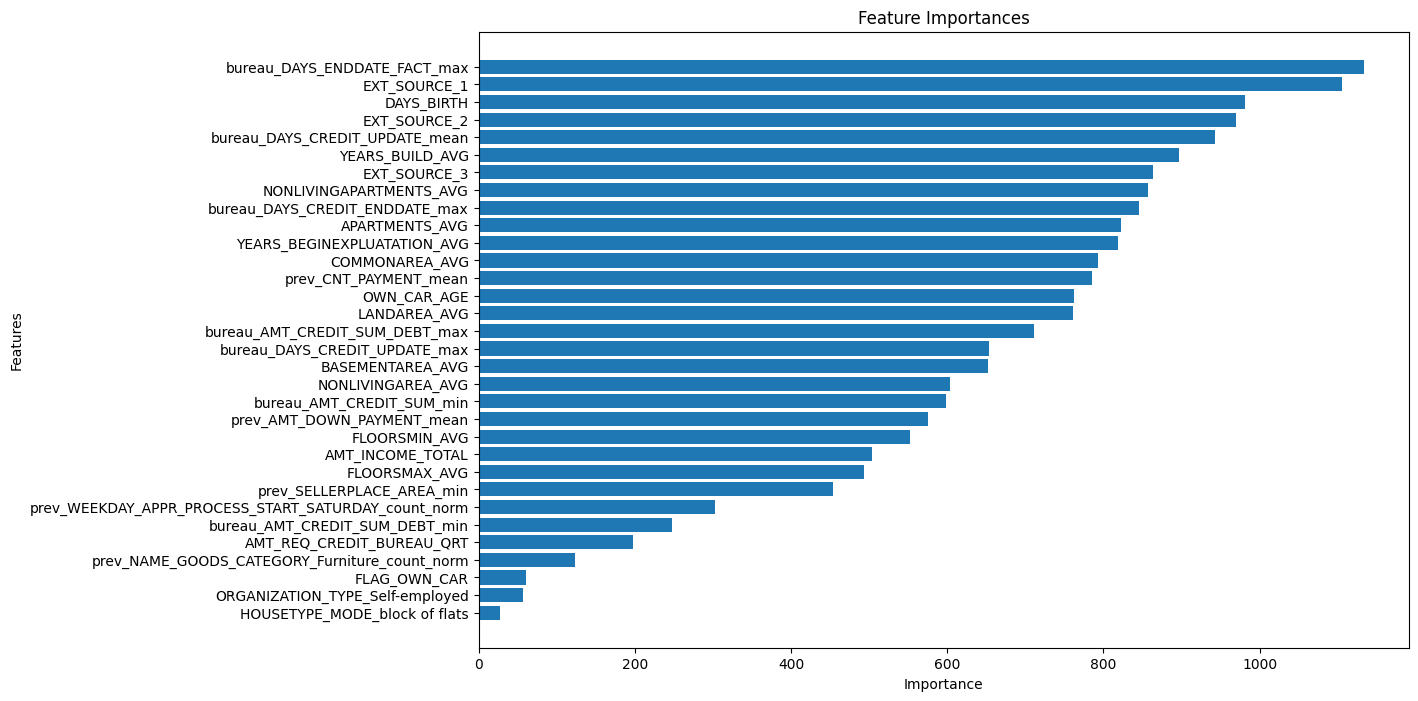

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('auc', 0.8776658595641647)])})

In [16]:
X = outliers_data_x
y = outliers_data_y

train_X_cv, test_X_cv, train_y_cv, test_y_cv = train_test_split(X, y, train_size=0.8, random_state=42)

model_lgbm.fit(train_X_cv, train_y_cv, eval_set=(test_X_cv, test_y_cv))


# Get feature importances
feature_importances = model_lgbm.feature_importances_

# Create a pandas dataframe for easier visualization
importance_df = pd.DataFrame({
    'Features': train_X_cv.columns,
    'Importance': feature_importances
})

# Sort the dataframe based on the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Features'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
model_lgbm.best_score_

In [17]:
y_test_pred_dr = model_lgbm.predict_proba(test_X_cv)
print(accuracy_score(y_true=test_y_cv, y_pred=y_test_pred_dr[:,1].round()))
print(roc_auc_score(y_true=test_y_cv, y_score=y_test_pred_dr[:,1], average="weighted"))
print(classification_report(test_y_cv, y_test_pred_dr[:,1].round()))

0.9509132420091324
0.8776658595641647
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4130
           1       0.65      0.30      0.41       250

    accuracy                           0.95      4380
   macro avg       0.81      0.64      0.69      4380
weighted avg       0.94      0.95      0.94      4380



In [18]:
y_pred = y_test_pred_dr[:,1]
y = test_y_cv

wandb.init(
        project=project_name, name=exp_name+"7.1"+"_lgbm_tuned_balanced"
    )  # Инициализация эксперимента, project - название проекта
wandb.log(
    {
        "accuracy_score": accuracy_score(y_true=y, y_pred=y_pred.round()),
        "f1_score_weighted": f1_score(y_true=y, y_pred=y_pred.round(), average="weighted"),
        "precision_weighted": precision_score(y_true=y, y_pred=y_pred.round(), average="weighted"),
        "roc_auc_score": roc_auc_score(y_true=y, y_score=y_pred, average="weighted"),
        "gini": 2 * roc_auc_score(y_true=y, y_score=y_pred, average="weighted") - 1
    }
)
wandb.sklearn.plot_roc(y_true = y, y_probas = y_test_pred_dr)
#wandb.sklearn.plot_class_proportions(y_train, y_test)
wandb.finish()

accuracy_score,▁
f1_score_weighted,▁
gini,▁
precision_weighted,▁
roc_auc_score,▁
accuracy_score,0.95091
f1_score_weighted,0.94205
gini,0.75533
precision_weighted,0.94141
roc_auc_score,0.87767


### Выводы эксперимента 7 и блока в целом
Итого лучшие результаты:

Отфильтрованные данные - 2_best_features_permutation.csv. Циклический катбуст для отбора признаков повысил интерпретируемость и поддерживаемость модели за счёт снижения порядка фич - 32 против 143. Признаки построены методами описательных статистик с удалением выбросов через IsolationForest.

Модель - lightGBM, затюненная на CV с дисбалансом классов. Точность модели и взвешенная F-мера у такого тюна лучше, чем у первого в данном ноутбуке, поэтому, в качестве финальной модели, берётся результат последнего эксперимента.

In [26]:
# Данные для демо, на которых замерялось качество модели
test_X_cv.to_csv("07_best_demo_data.csv", index=False)

# Лучшая модель
joblib.dump(model_lgbm, 'lgb.pkl')


['lgb.pkl']

In [7]:
X = outliers_data_x
y = outliers_data_y
train_X_cv, test_X_cv, train_y_cv, test_y_cv = train_test_split(X, y, train_size=0.8, random_state=42)

In [8]:
# load model
demo_data = pd.read_csv("07_best_demo_data.csv")
gbm_pickle = joblib.load('lgb.pkl')
y_test_pred_dr = gbm_pickle.predict_proba(demo_data)
print(accuracy_score(y_true=test_y_cv, y_pred=y_test_pred_dr[:,1].round()))
print(roc_auc_score(y_true=test_y_cv, y_score=y_test_pred_dr[:,1], average="weighted"))
print(classification_report(test_y_cv, y_test_pred_dr[:,1].round()))

0.9509132420091324
0.8776658595641647
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4130
           1       0.65      0.30      0.41       250

    accuracy                           0.95      4380
   macro avg       0.81      0.64      0.69      4380
weighted avg       0.94      0.95      0.94      4380

